In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [1]:
INDIR = "/data/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/"
OUTDIR = "/data/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/af_depth/"
DONOR = 0



In [2]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

fig_utils from mplh
0.5.6


In [3]:
out_f = join(OUTDIR, f"donor{DONOR}")


In [4]:
OUTDIR

'/data/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/af_depth/'

## Load cluster results and plot dendrograms

In [5]:
af_indir = join(INDIR, "sc_af", f"donor{DONOR}")

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


In [6]:
print(AF_df.shape)
AF_df.head()

(196, 8275)


AAACGAAAGAATCAGT-1_Control  AAACGAAAGCATACCT-1_Control  \
Variant                                                           
2960C                           0.0                         0.0   
16172C                          0.0                         0.0   
16296T                          1.0                         1.0   
13269G                          0.0                         0.0   
150T                            1.0                         1.0   

         AAACGAAAGTACAGTA-1_Control  AAACGAAAGTGTCGGA-1_Control  \
Variant                                                           
2960C                      0.000000                         0.0   
16172C                     0.000000                         0.0   
16296T                     1.000000                         1.0   
13269G                     0.000000                         0.0   
150T                       0.947368                         1.0   

         AAACGAAGTCTTAGCA-1_Control  AAACGAAGTGTTTCTT-1_Control  \
Variant                                                           
2960C                           0.0                         0.0   
16172C                          0.0                         0.0   
16296T                          1.0                         1.0   
13269G                          0.0                         0.0   
150T                            1.0                         1.0   

         AAACGAATCCCACGGA-1_Control  AAACTCGAGTCTCTAG-1_Control  \
Variant                                                           
2960C                      0.000000                         0.0   
16172C                     0.000000                         0.0   
16296T                     0.928571                         1.0   
13269G                     0.000000                         0.0   
150T                       1.000000                         1.0   

         AAACTCGGTCTGCACG-1_Control  AAACTCGGTTGGCTTA-1_Control  ...  \
Variant                                                          ...   
2960C                           0.0                    0.000000  ...   
16172C                          0.0                    0.000000  ...   
16296T                          1.0                    1.000000  ...   
13269G                          0.0                    0.000000  ...   
150T                            1.0                    0.972973  ...   

         TTTGTGTAGGTTGTTC-1_Input  TTTGTGTAGGTTTCTG-1_Input  \
Variant                                                       
2960C                         0.0                       0.0   
16172C                        0.0                       0.0   
16296T                        1.0                       0.0   
13269G                        0.0                       0.0   
150T                          1.0                       1.0   

         TTTGTGTAGTAGACCG-1_Input  TTTGTGTCAACTCGTA-1_Input  \
Variant                                                       
2960C                         0.0                       0.0   
16172C                        0.0                       0.0   
16296T                        1.0                       1.0   
13269G                        0.0                       0.0   
150T                          1.0                       1.0   

         TTTGTGTCAAGCCAGA-1_Input  TTTGTGTCAATGACTC-1_Input  \
Variant                                                       
2960C                    0.000000                       0.0   
16172C                   0.000000                       0.0   
16296T                   1.000000                       0.0   
13269G                   0.000000                       0.0   
150T                     0.982143                       1.0   

         TTTGTGTCAGAAAGAG-1_Input  TTTGTGTCATAGCCAT-1_Input  \
Variant                                                       
2960C                         0.0                       0.0   
16172C                        0.0                       0.0   
16296T                        1.0             

In [7]:
print(DP_df.shape)
DP_df.head()

(196, 8275)


AAACGAAAGAATCAGT-1_Control  AAACGAAAGCATACCT-1_Control  \
Variant                                                           
10397G                         13.0                        25.0   
10463C                         12.0                        27.0   
10559G                         10.0                        23.0   
10589A                          6.0                        23.0   
11251G                         11.0                        30.0   

         AAACGAAAGTACAGTA-1_Control  AAACGAAAGTGTCGGA-1_Control  \
Variant                                                           
10397G                         12.0                         8.0   
10463C                         17.0                         5.0   
10559G                         24.0                         7.0   
10589A                         23.0                         4.0   
11251G                         29.0                        10.0   

         AAACGAAGTCTTAGCA-1_Control  AAACGAAGTGTTTCTT-1_Control  \
Variant                                                           
10397G                         22.0                        19.0   
10463C                         24.0                         6.0   
10559G                         23.0                         6.0   
10589A                         26.0                         7.0   
11251G                         28.0                        11.0   

         AAACGAATCCCACGGA-1_Control  AAACTCGAGTCTCTAG-1_Control  \
Variant                                                           
10397G                         29.0                        15.0   
10463C                         16.0                        14.0   
10559G                         15.0                        12.0   
10589A                         26.0                         9.0   
11251G                         25.0                        29.0   

         AAACTCGGTCTGCACG-1_Control  AAACTCGGTTGGCTTA-1_Control  ...  \
Variant                                                          ...   
10397G                         21.0                        37.0  ...   
10463C                         29.0                        49.0  ...   
10559G                         34.0                        28.0  ...   
10589A                         37.0                        27.0  ...   
11251G                         55.0                        47.0  ...   

         TTTGTGTAGGTTGTTC-1_Input  TTTGTGTAGGTTTCTG-1_Input  \
Variant                                                       
10397G                      108.0                      66.0   
10463C                      130.0                      62.0   
10559G                      160.0                      87.0   
10589A                      194.0                     108.0   
11251G                      215.0                      99.0   

         TTTGTGTAGTAGACCG-1_Input  TTTGTGTCAACTCGTA-1_Input  \
Variant                                                       
10397G                       66.0                     126.0   
10463C                       76.0                     159.0   
10559G                      108.0                     116.0   
10589A                       98.0                     102.0   
11251G                      104.0                     102.0   

         TTTGTGTCAAGCCAGA-1_Input  TTTGTGTCAATGACTC-1_Input  \
Variant                                                       
10397G                       65.0                      89.0   
10463C                       59.0                      94.0   
10559G                       69.0                      63.0   
10589A                       64.0                      59.0   
11251G                      109.0                      89.0   

         TTTGTGTCAGAAAGAG-1_Input  TTTGTGTCATAGCCAT-1_Input  \
Variant                                                       
10397G                      131.0                      49.0   
10463C                      116.0                      53.0   
10559G                      136.0             

## Scatter

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


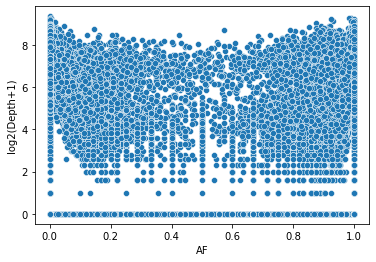

In [8]:
sns.scatterplot(AF_df.values.flatten(), np.log2(DP_df.values.flatten()+1))
plt.xlabel("AF")
plt.ylabel("log2(Depth+1)")
plt.savefig(f"{out_f}.all_variants.png")

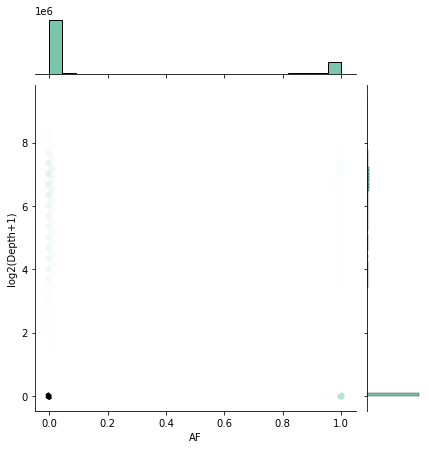

In [9]:
sns.jointplot(x=AF_df.values.flatten(), y=np.log2(DP_df.values.flatten()+1), 
              kind="hex", color="#4CB391")
plt.xlabel("AF")
plt.ylabel("log2(Depth+1)")
plt.savefig(f"{out_f}.all_variants_hex.png")

In [10]:
def rm_high(df, thresh, pct_thresh):
    return df.loc[~(((df>thresh).sum(axis=1)>pct_thresh*df.shape[0]))]

def rm_low(df, thresh, pct_thresh):
    return df.loc[~((df<thresh).sum(axis=1)>(pct_thresh*df.shape[1]))]

donor_inds = AF_df.index[((AF_df>0.8).sum(axis=1)>(0.8*AF_df.shape[1]))]
donor_inds
AF_df_noDon = rm_high(AF_df, 0.8,0.8)
DP_df_noDon = DP_df.loc[AF_df_noDon.index, AF_df_noDon.columns]

## Variant-specific

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


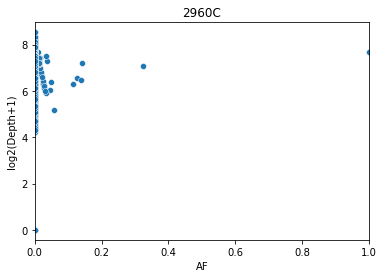

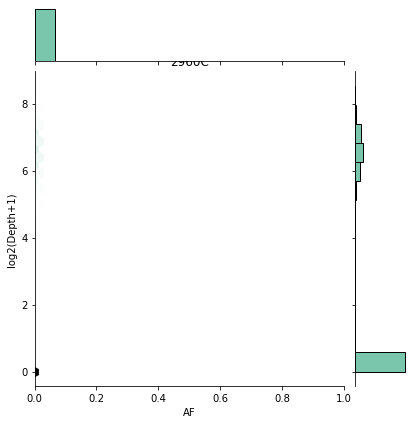

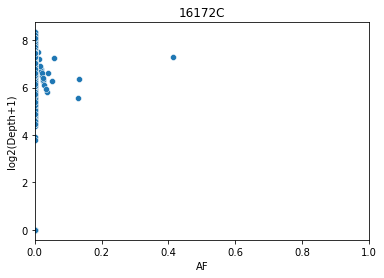

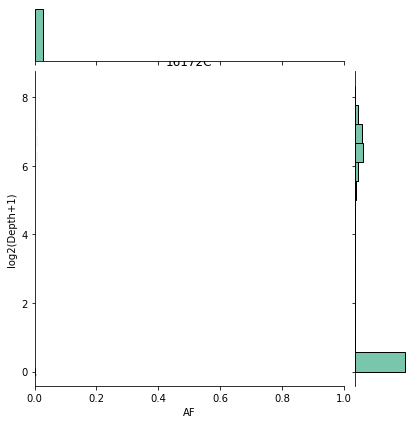

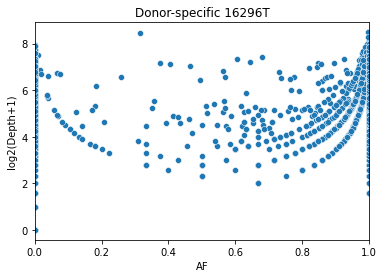

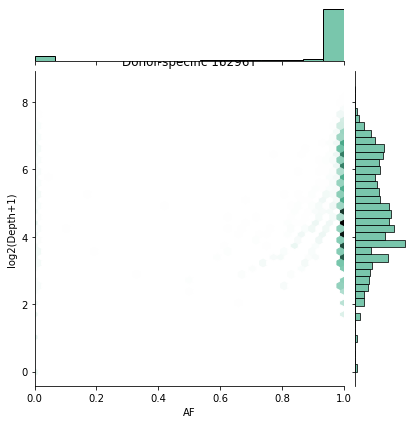

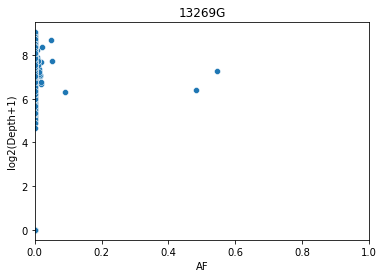

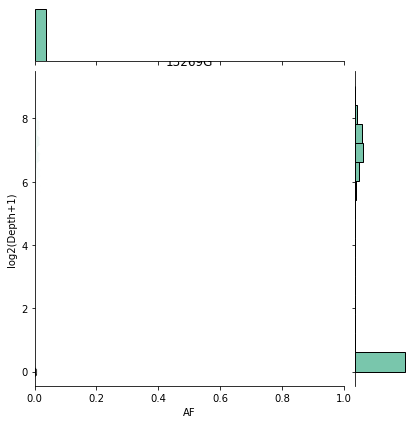

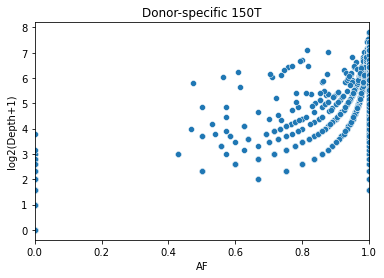

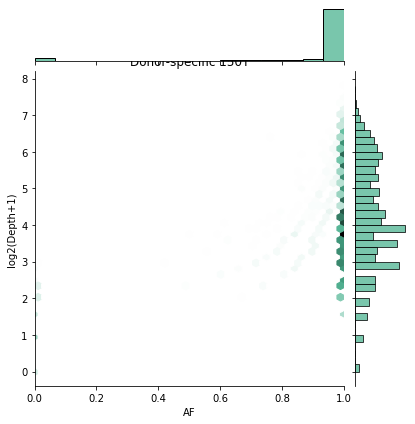

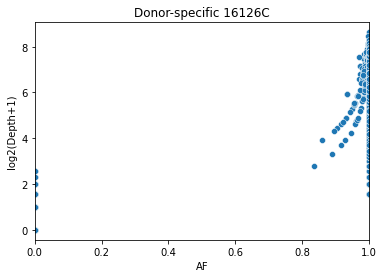

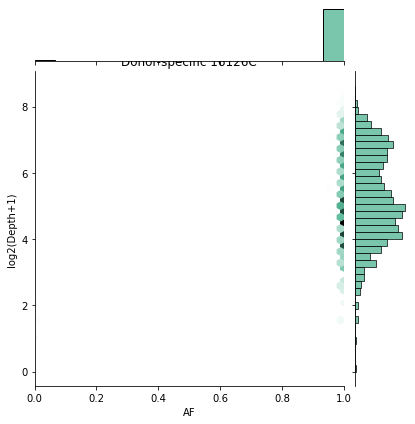

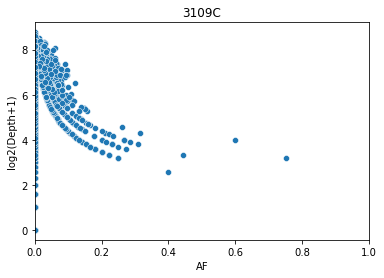

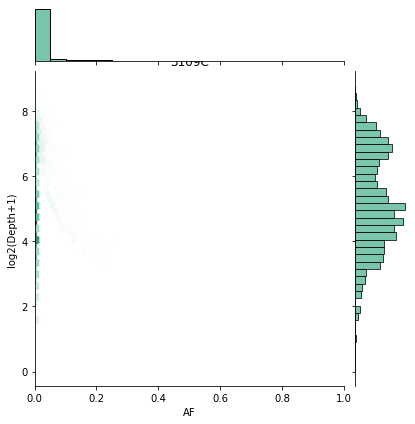

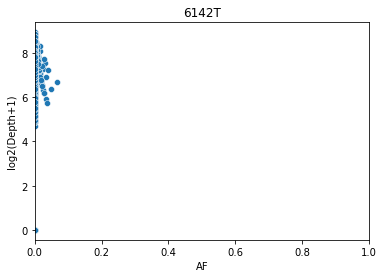

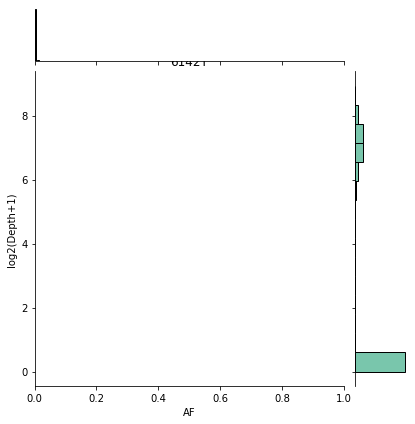

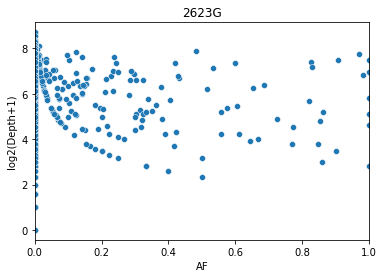

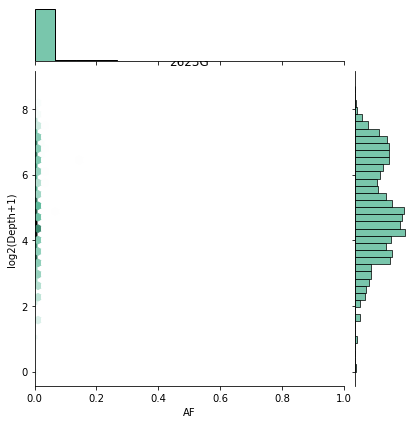

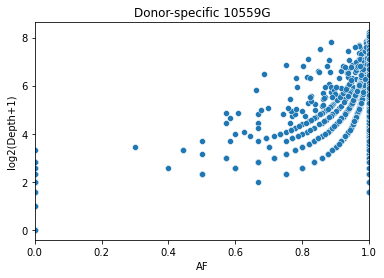

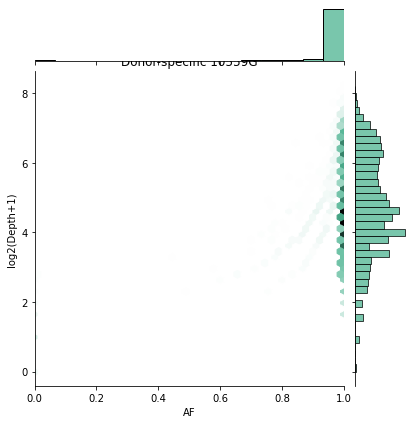

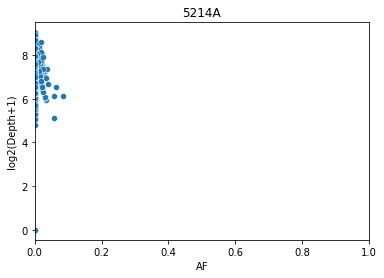

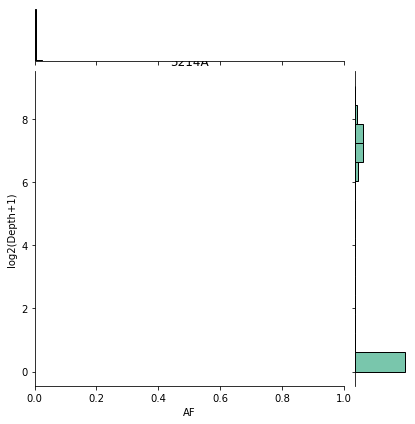

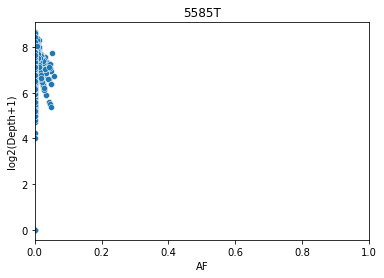

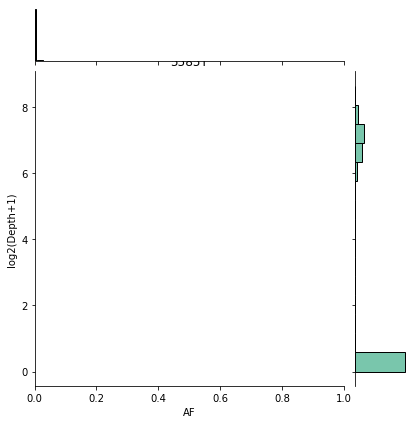

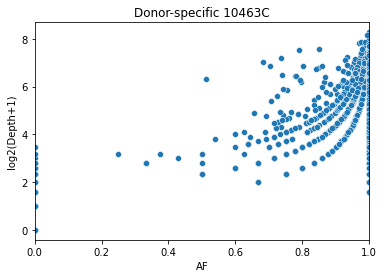

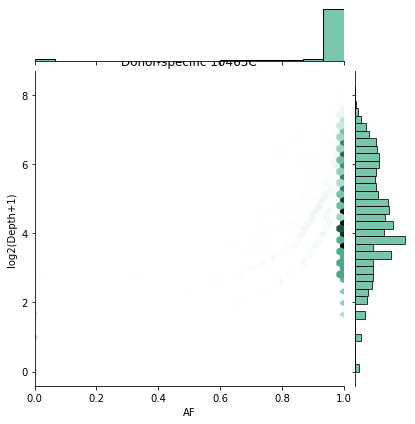

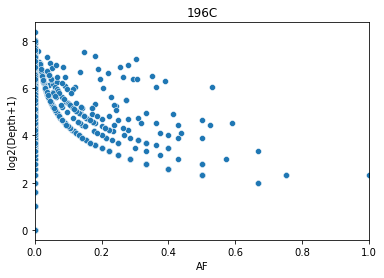

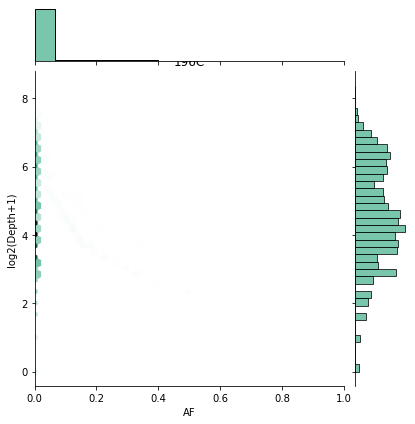

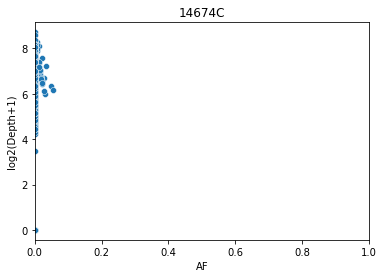

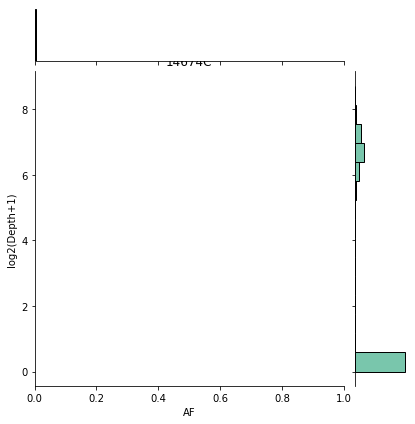

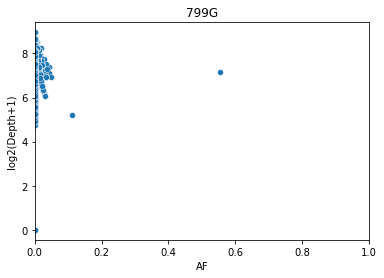

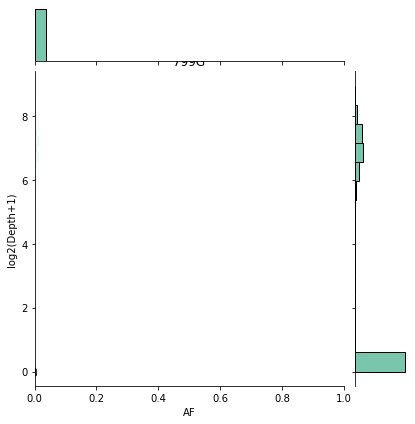

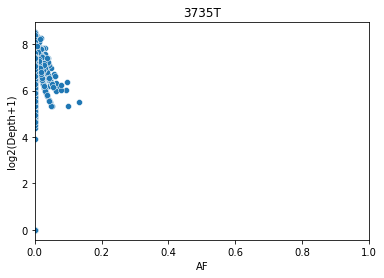

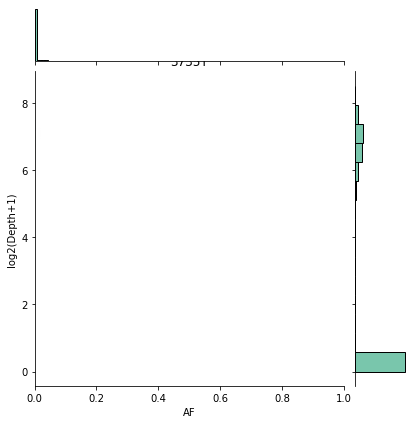

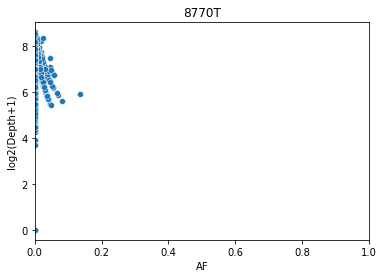

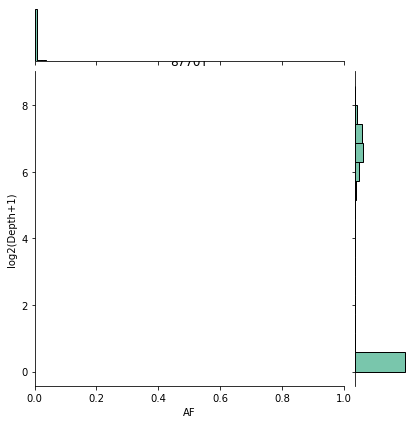

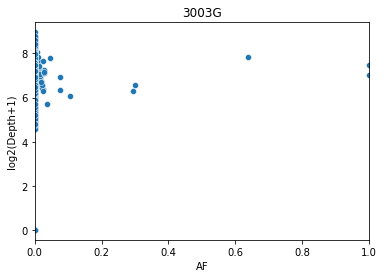

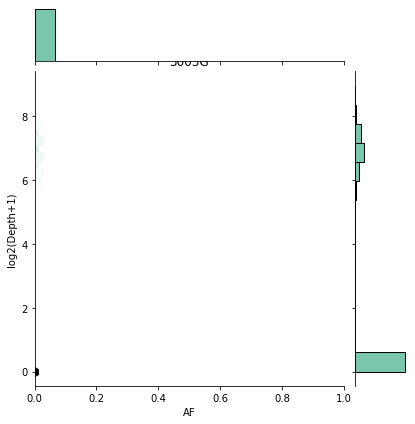

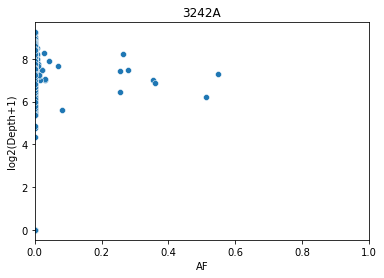

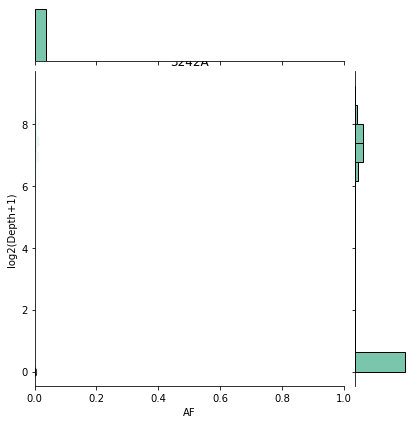

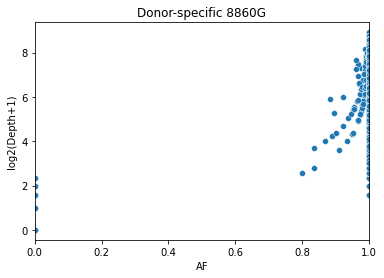

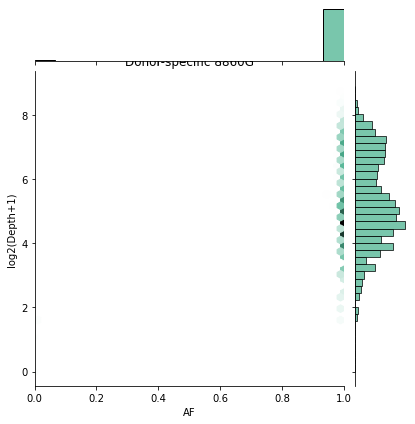

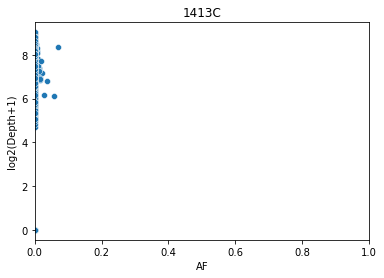

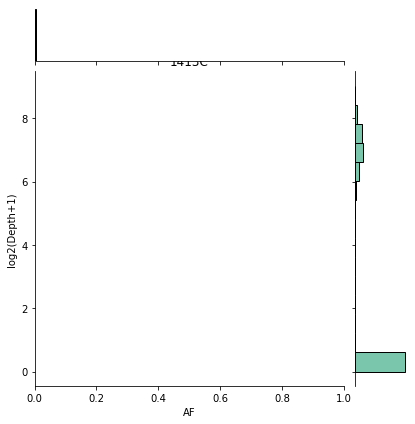

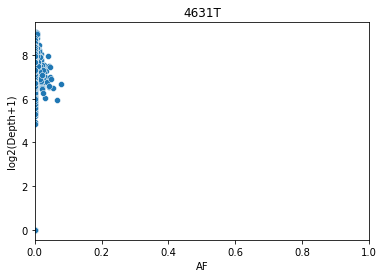

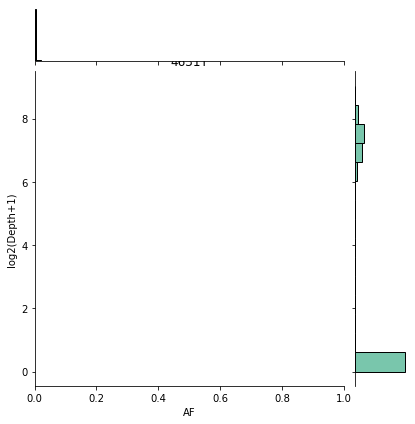

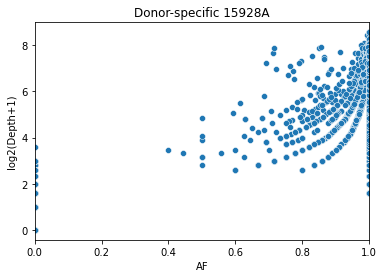

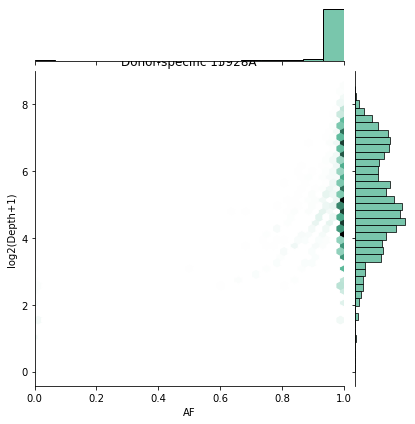

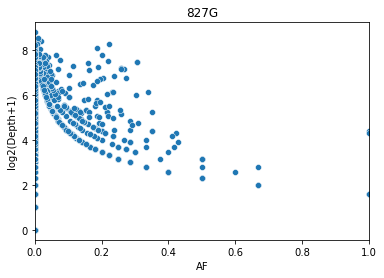

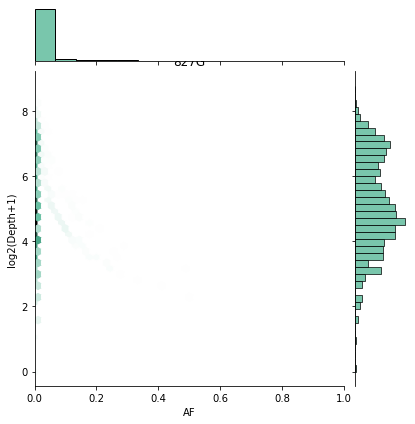

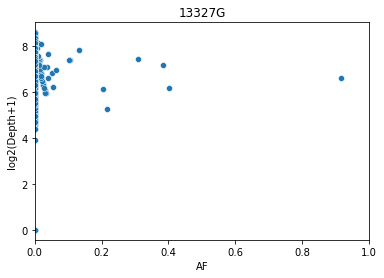

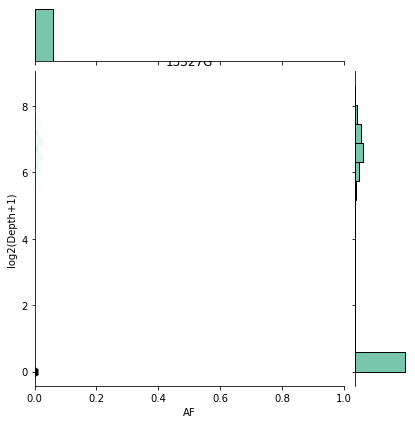

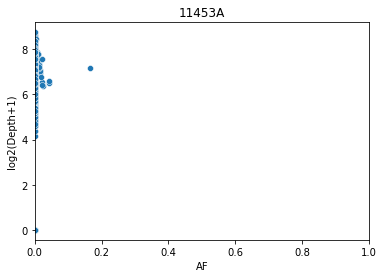

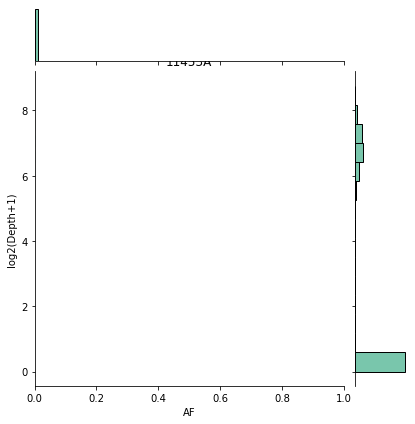

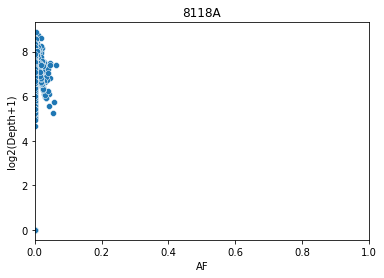

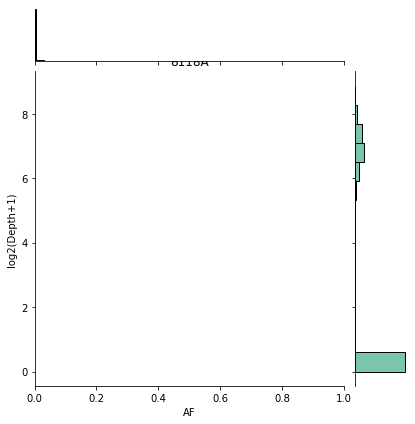

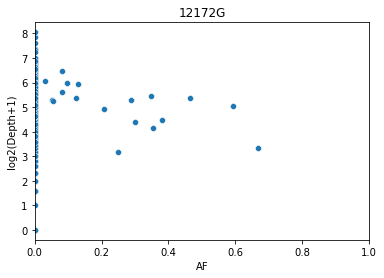

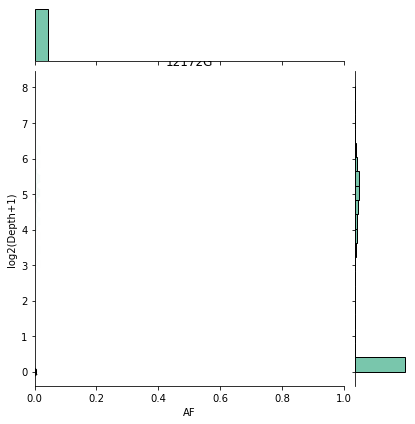

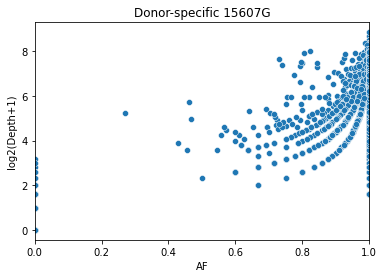

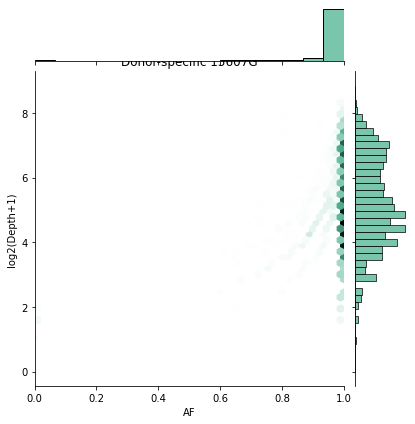

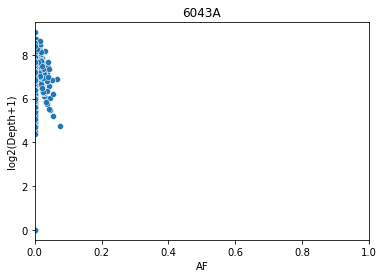

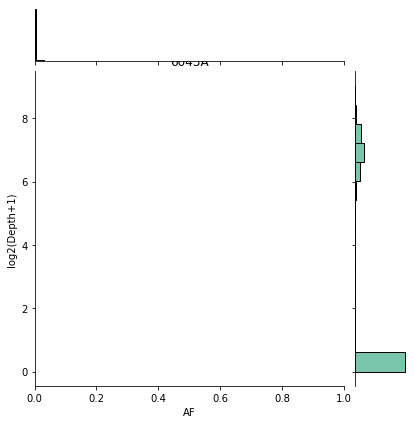

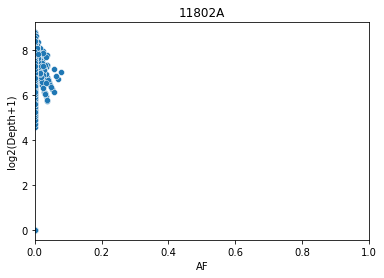

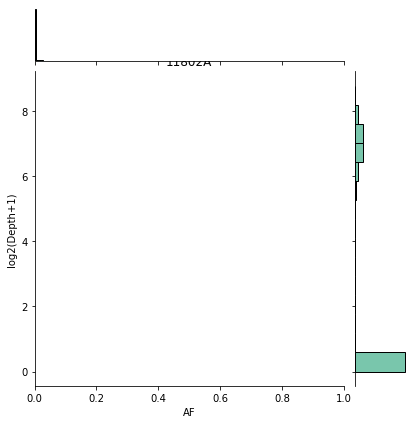

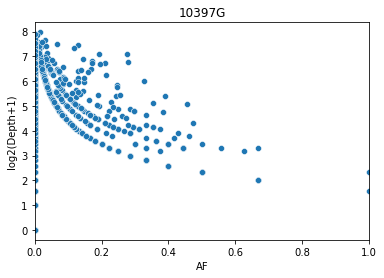

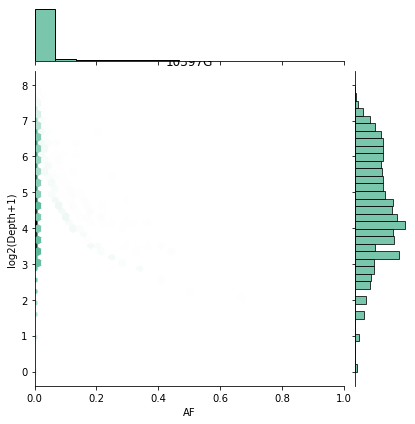

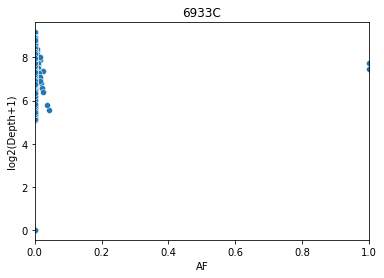

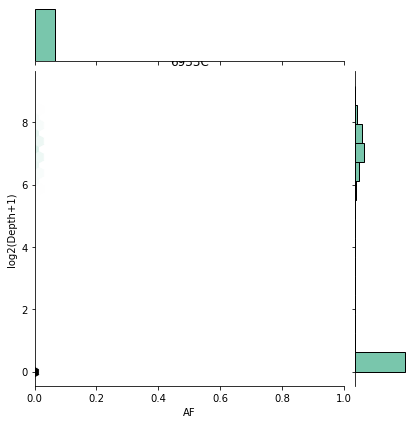

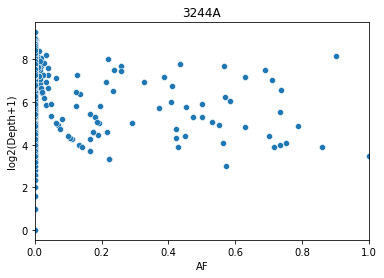

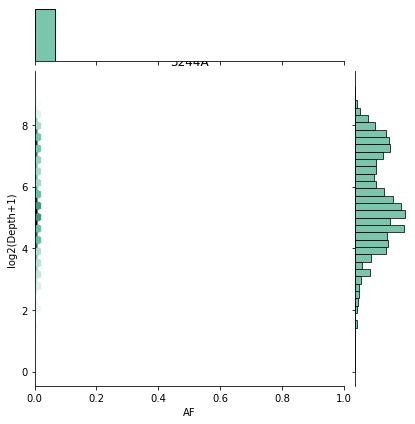

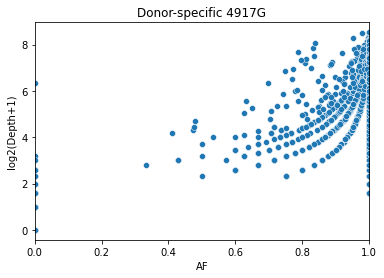

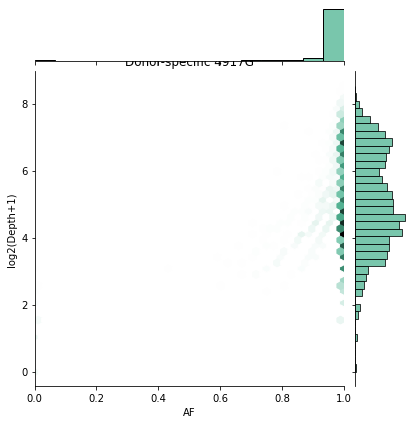

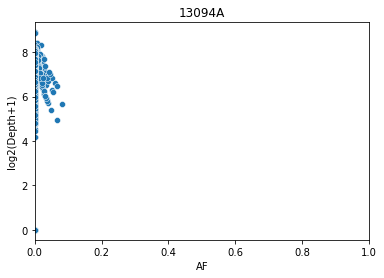

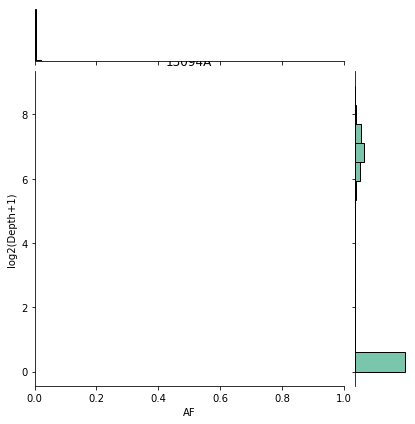

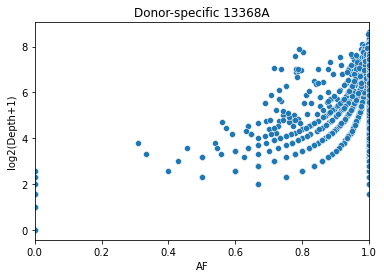

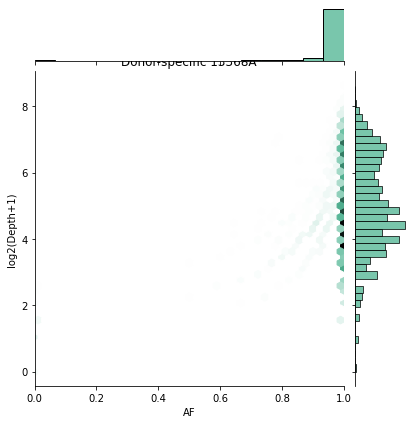

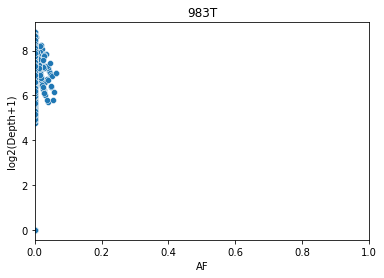

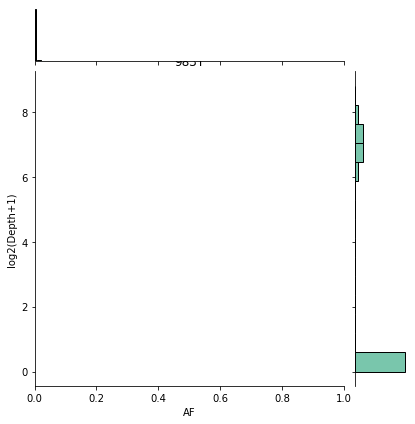

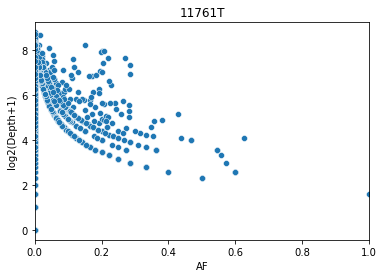

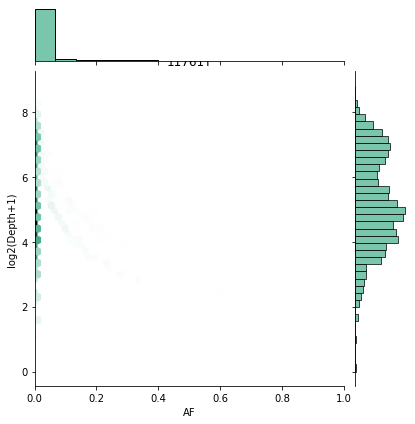

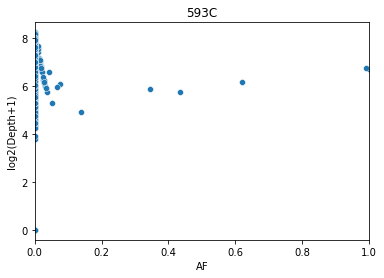

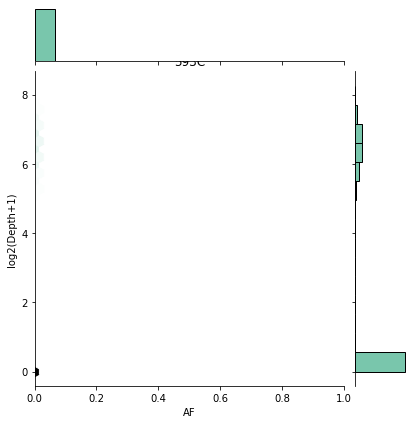

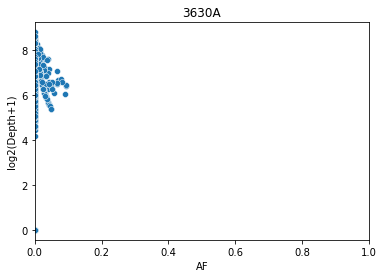

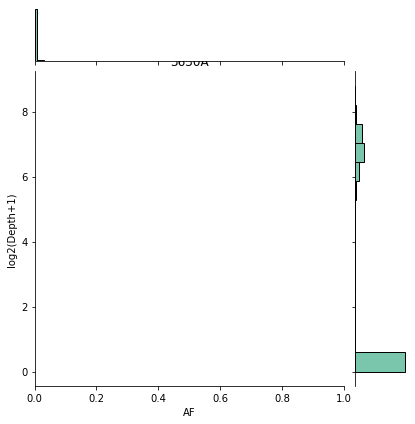

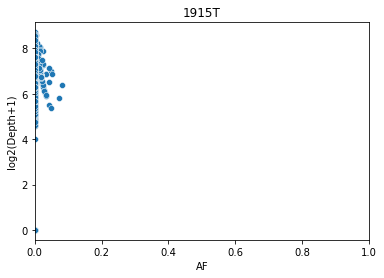

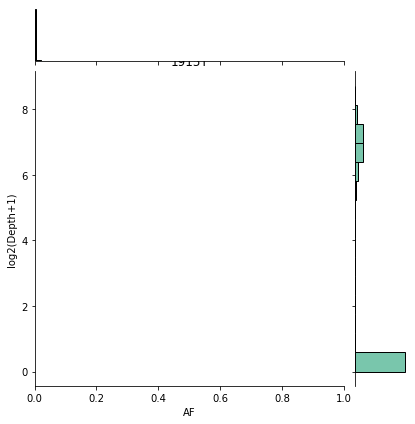

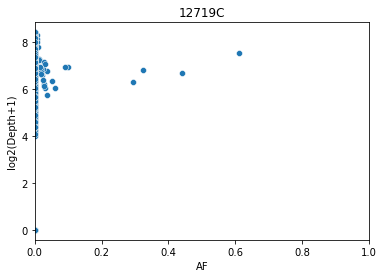

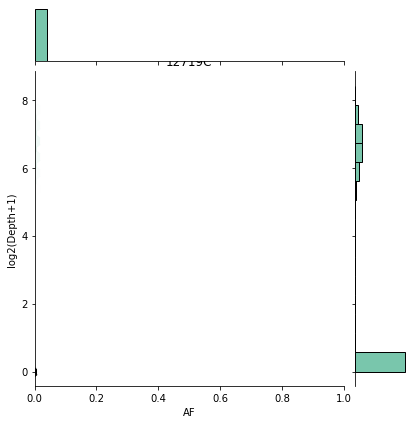

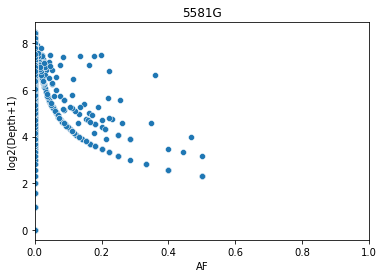

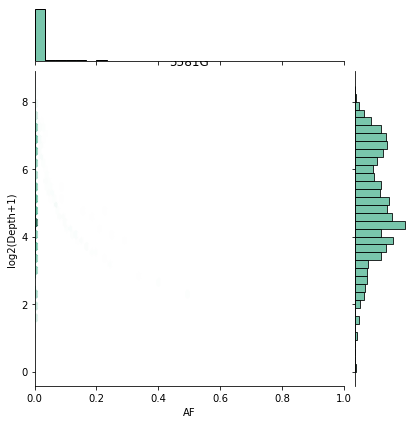

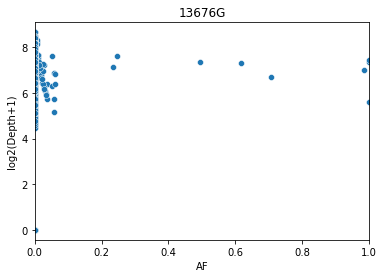

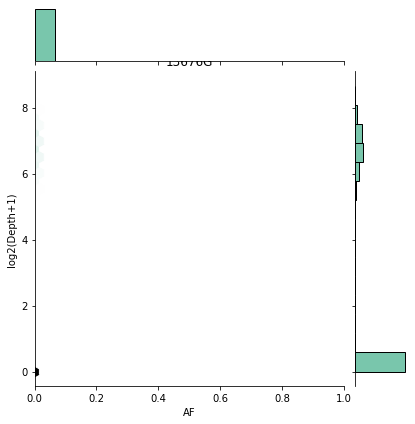

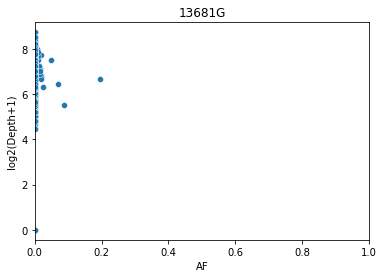

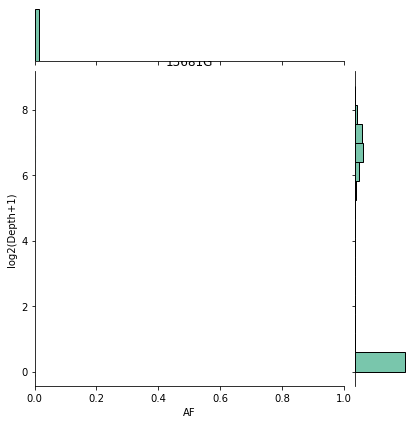

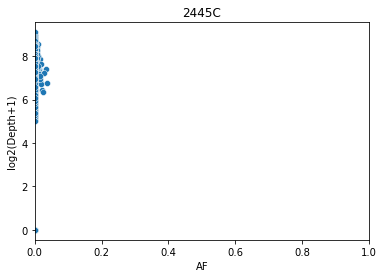

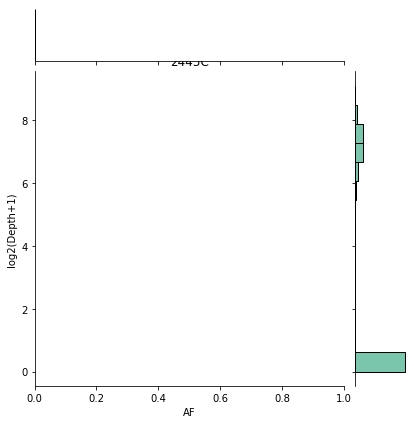

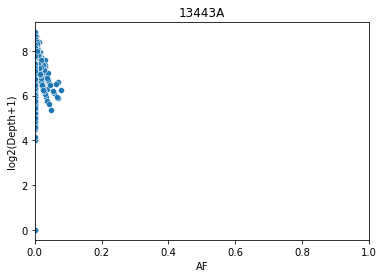

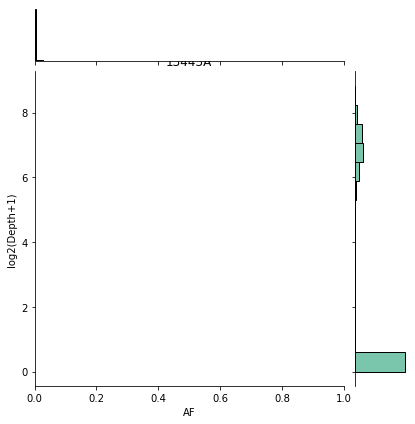

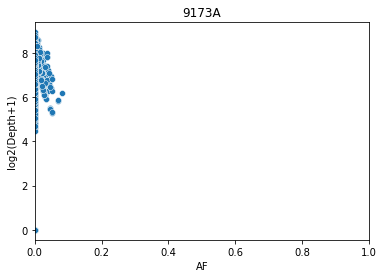

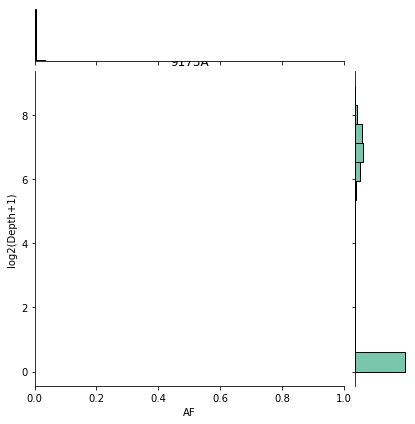

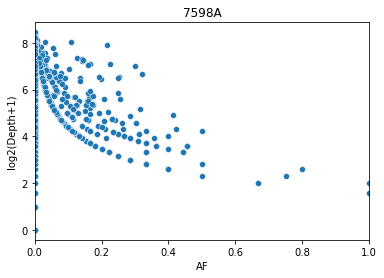

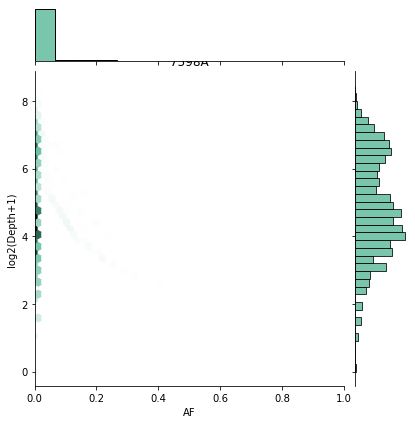

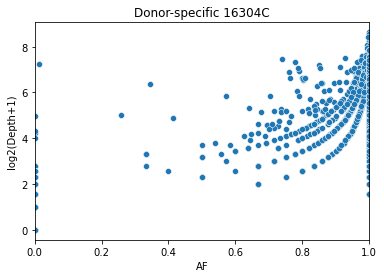

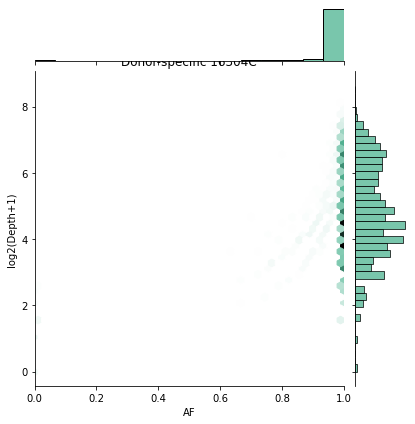

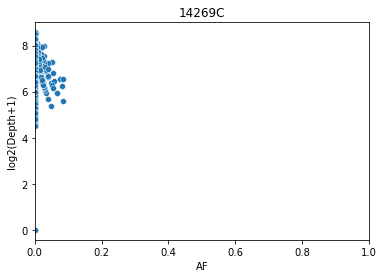

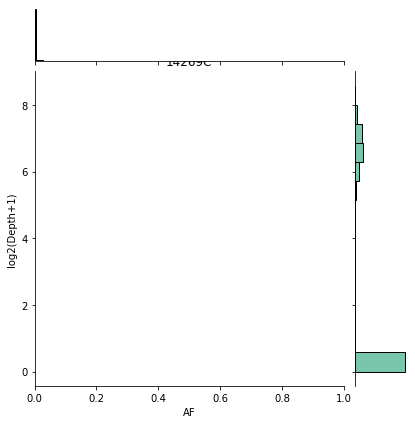

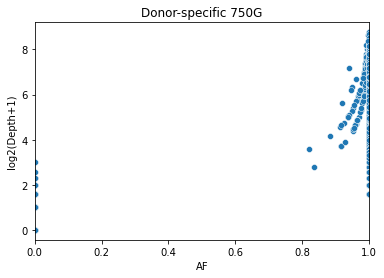

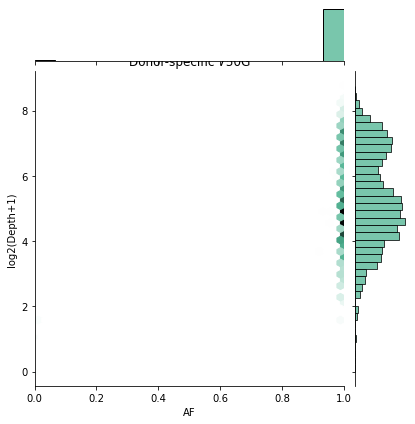

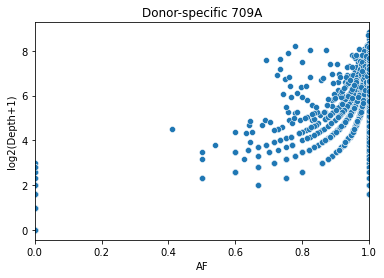

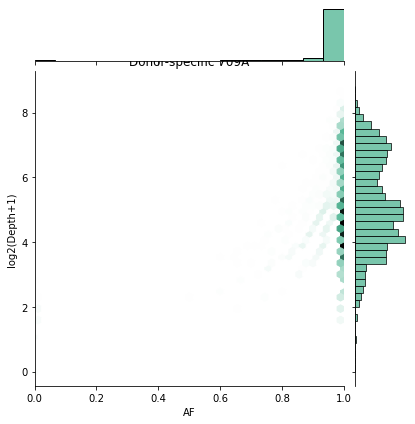

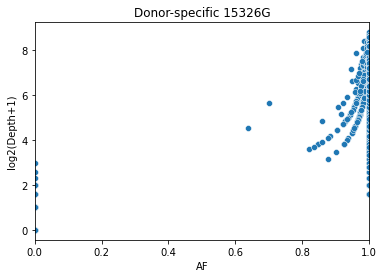

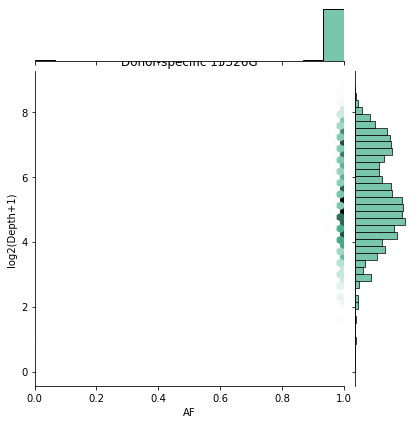

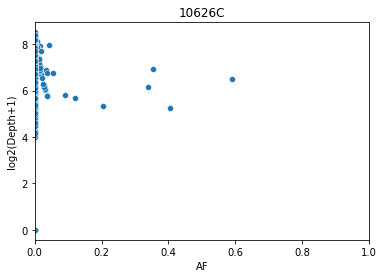

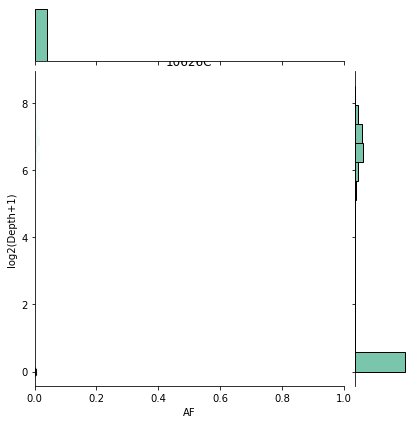

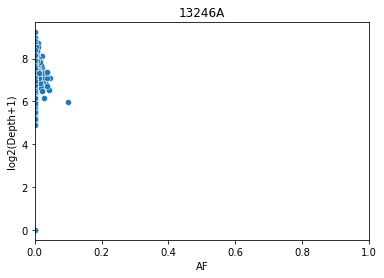

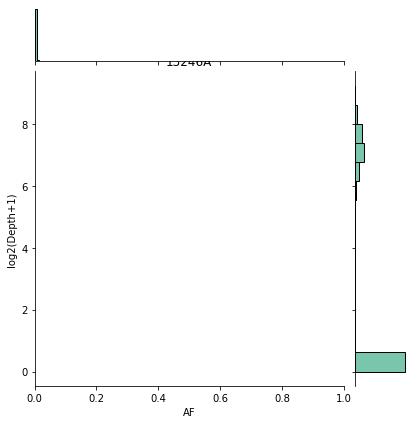

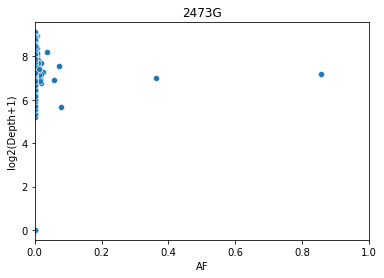

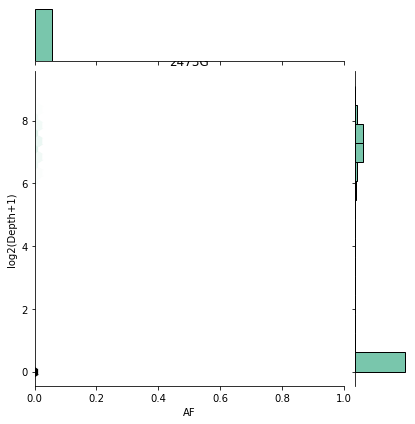

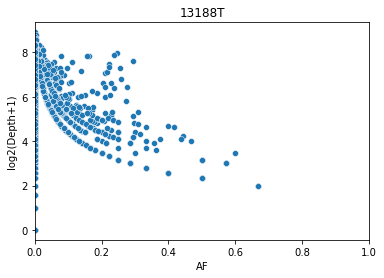

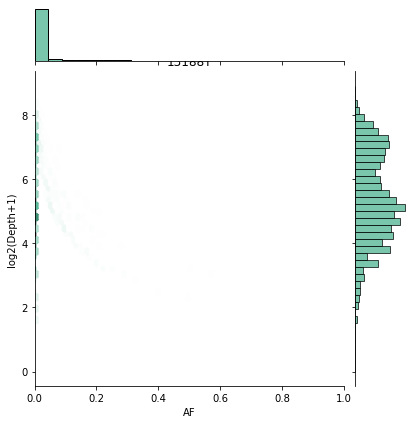

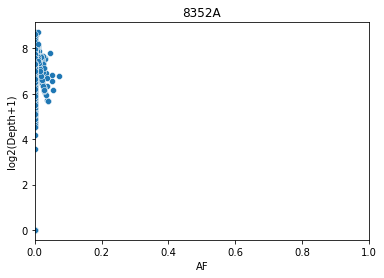

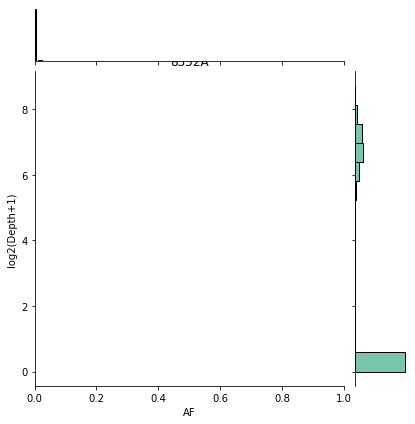

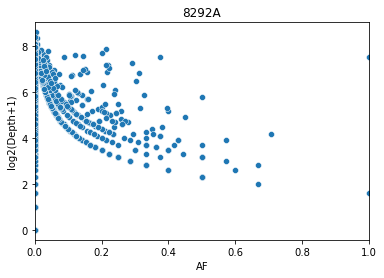

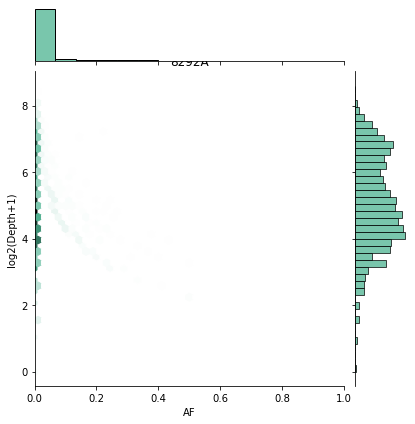

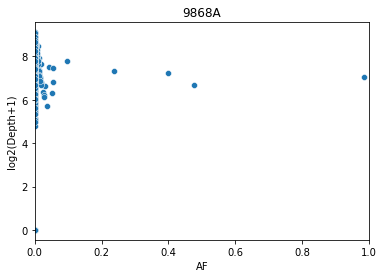

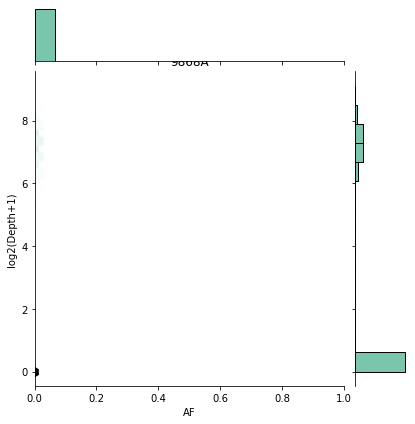

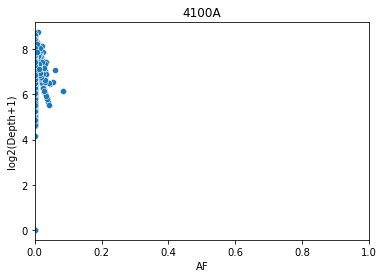

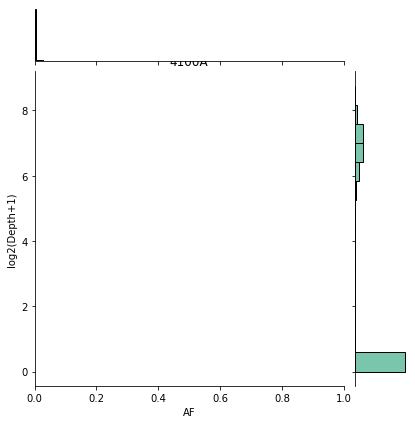

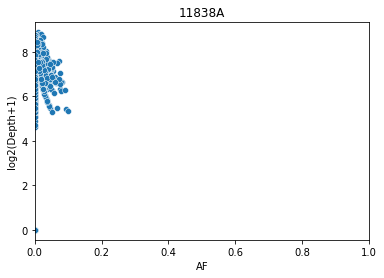

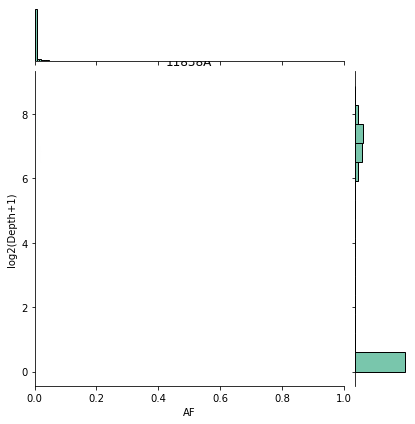

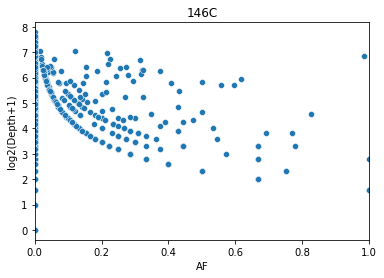

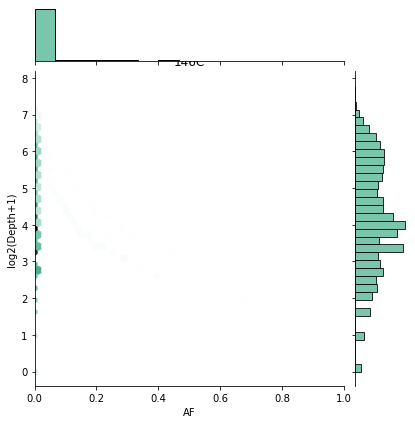

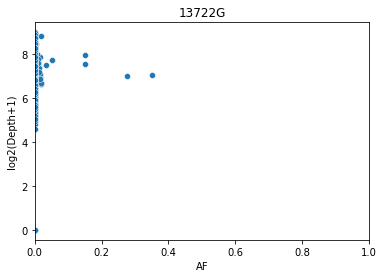

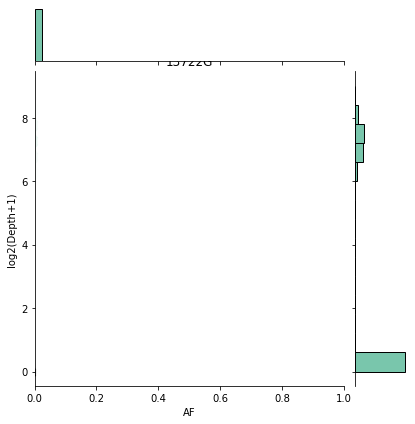

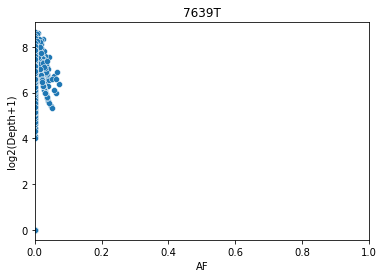

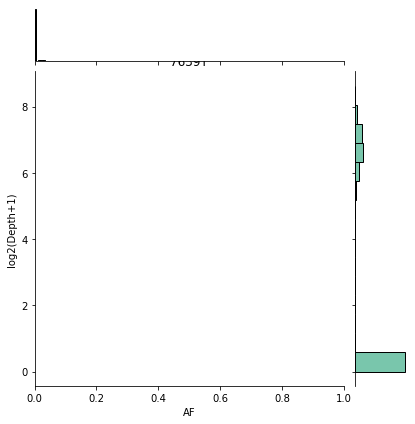

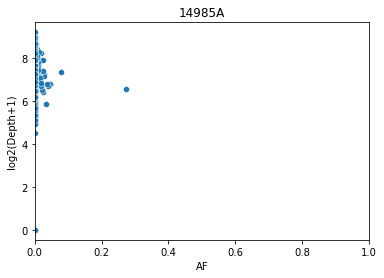

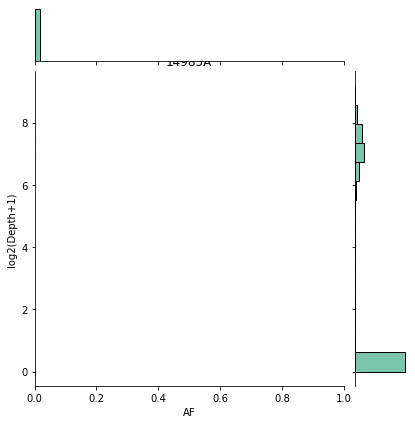

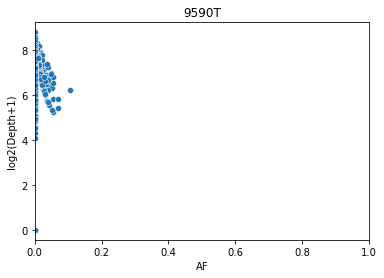

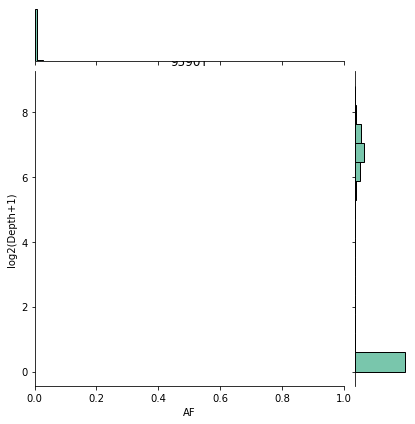

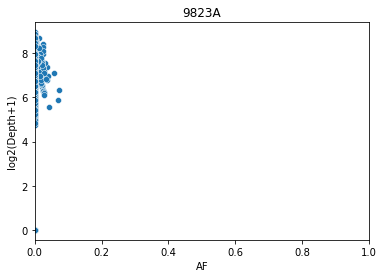

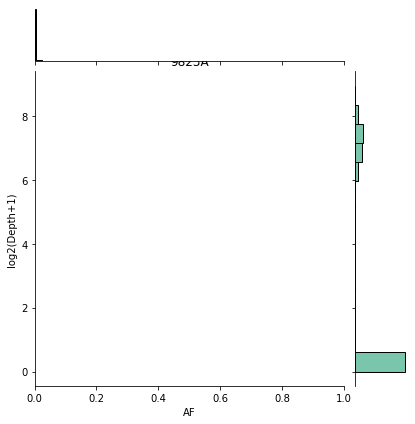

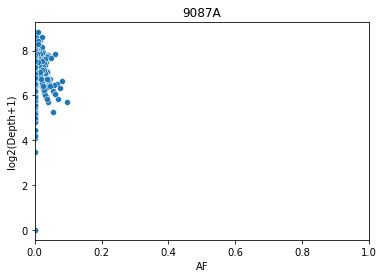

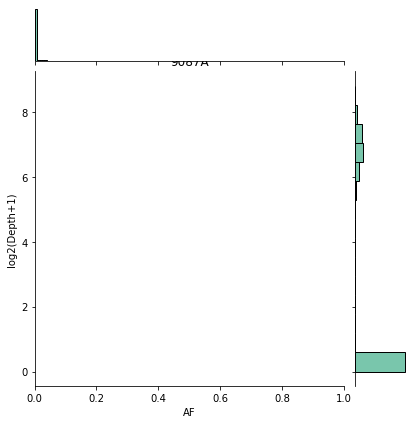

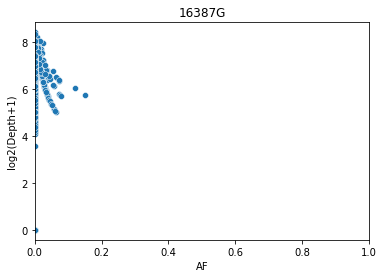

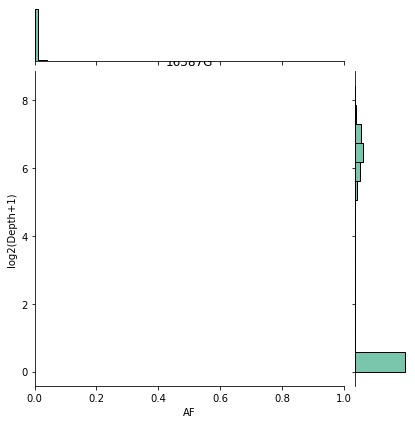

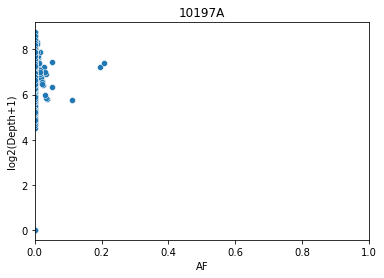

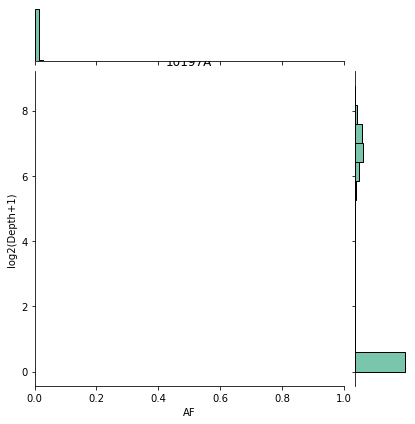

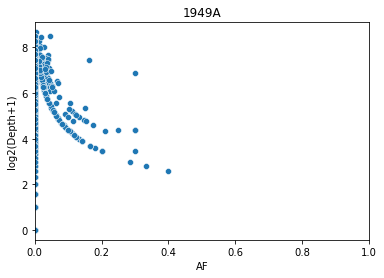

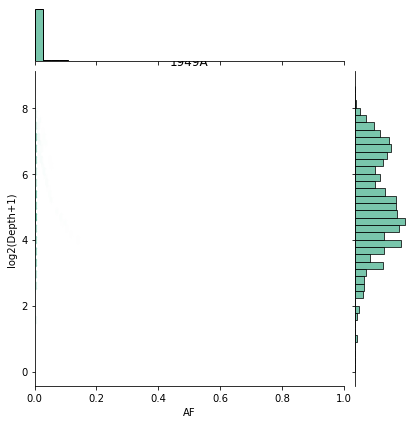

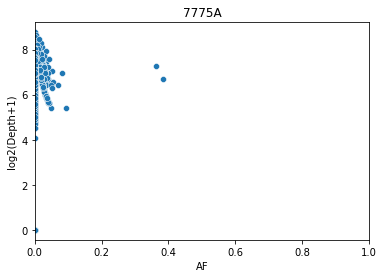

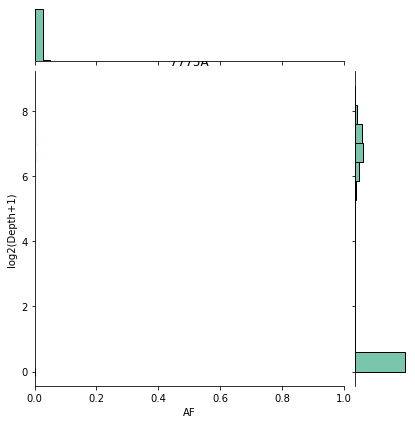

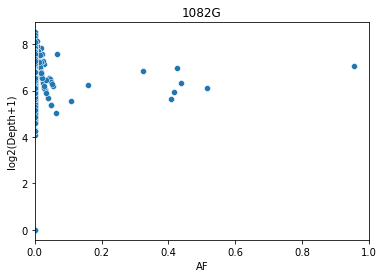

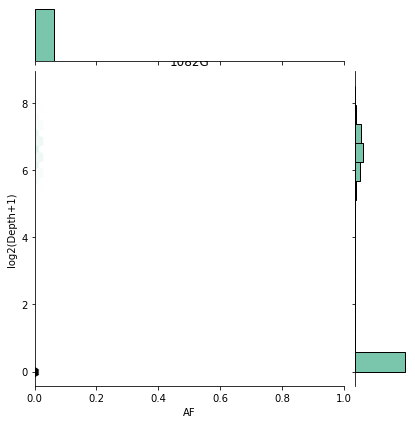

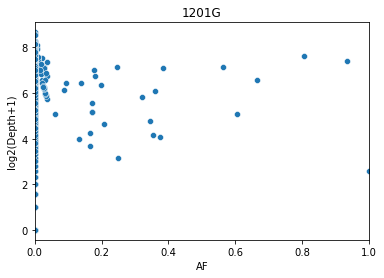

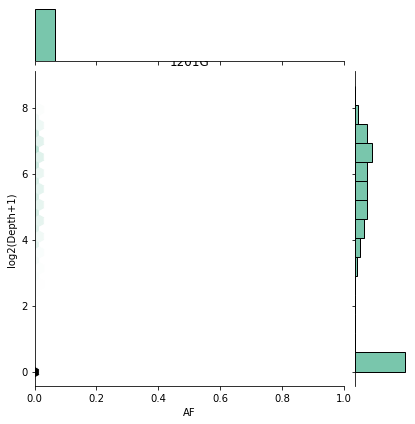

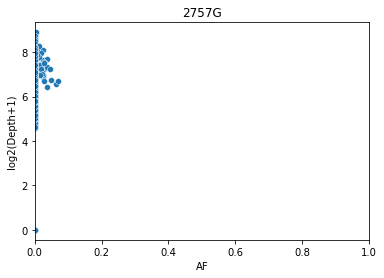

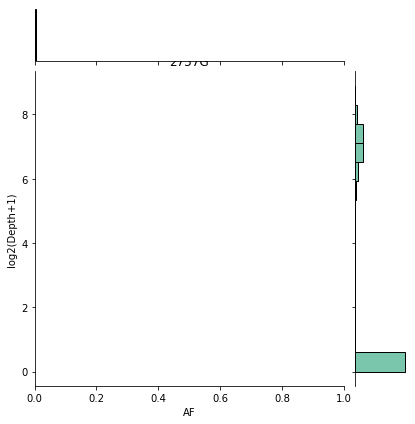

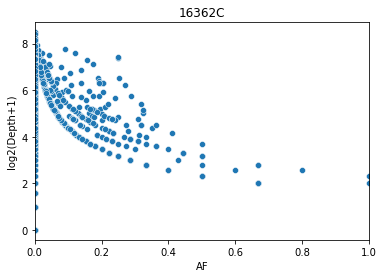

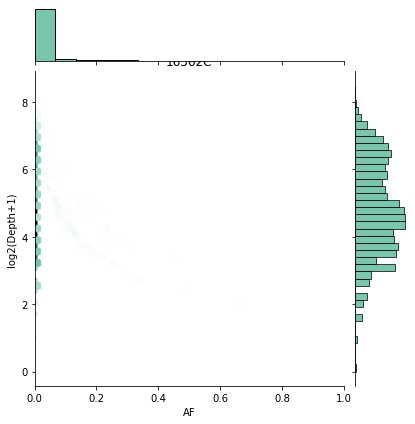

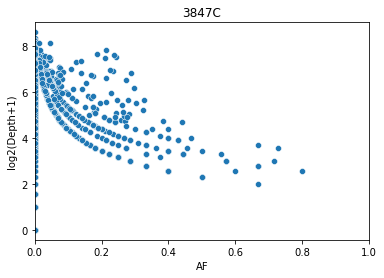

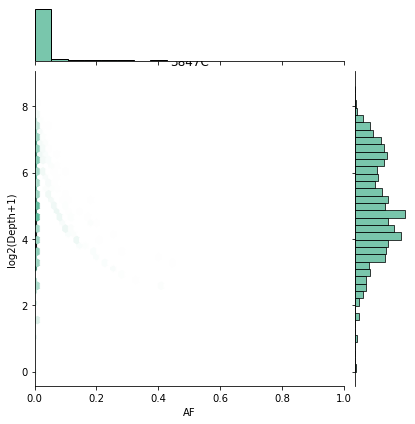

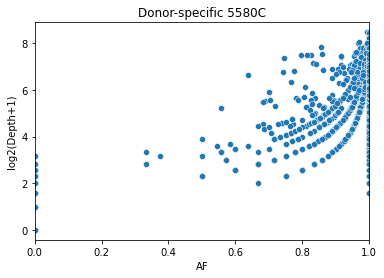

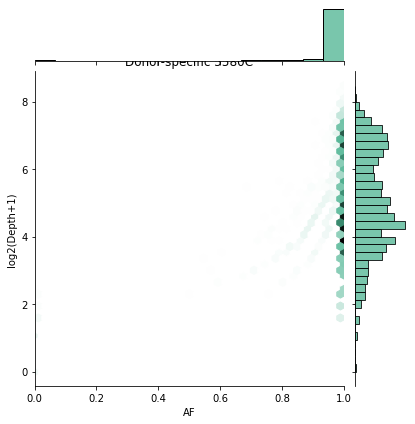

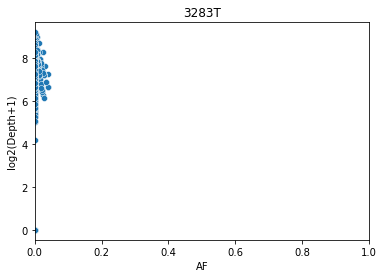

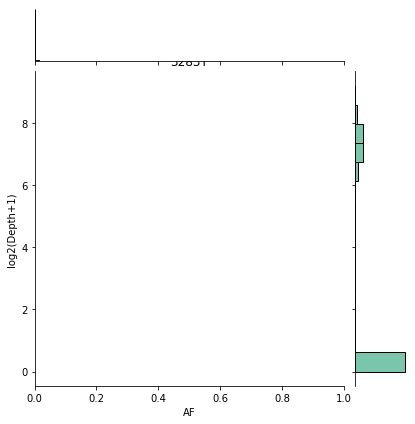

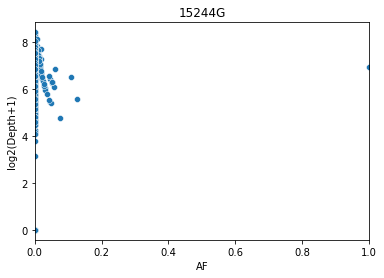

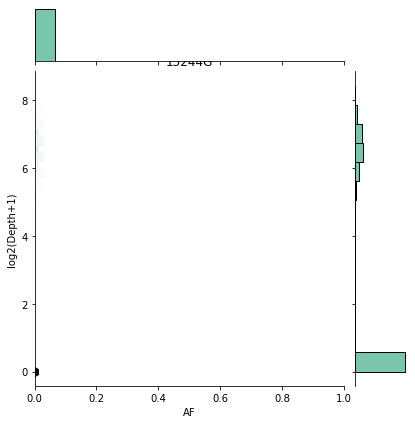

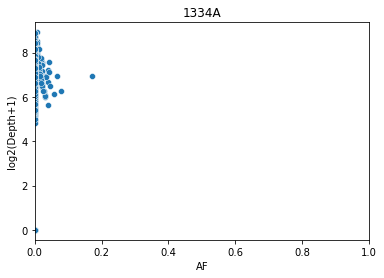

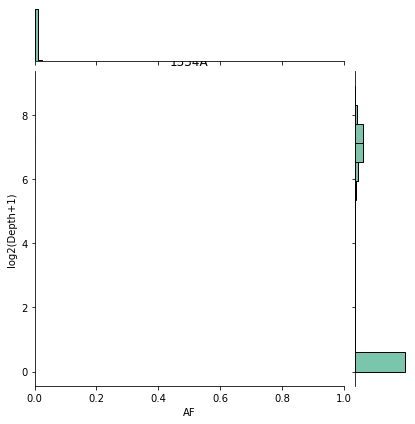

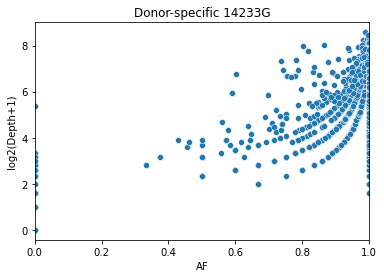

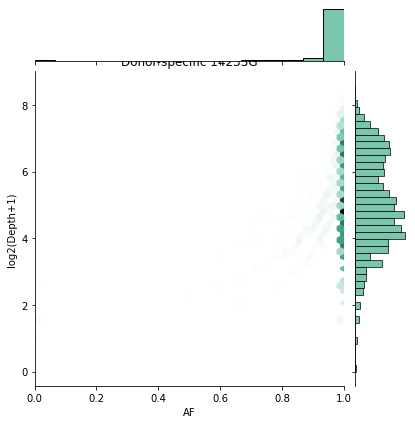

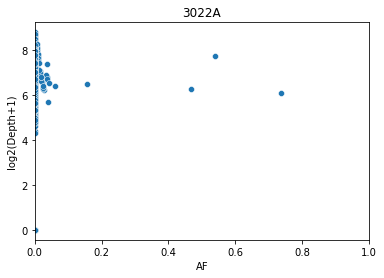

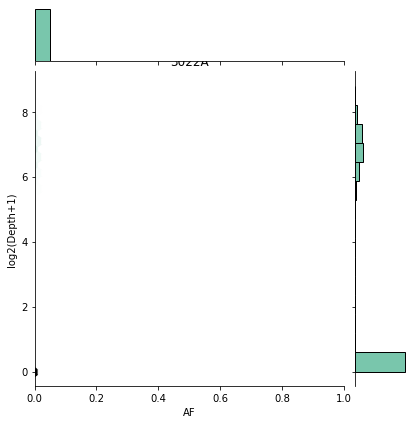

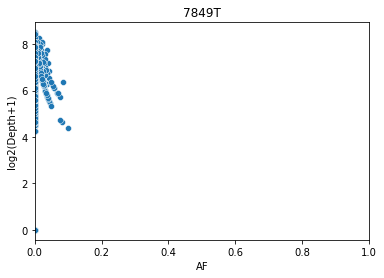

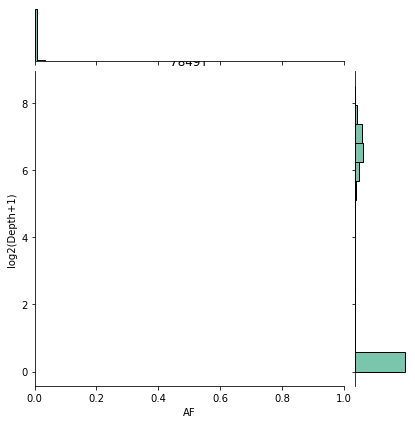

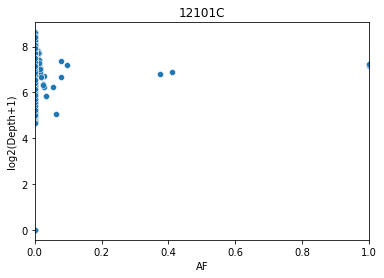

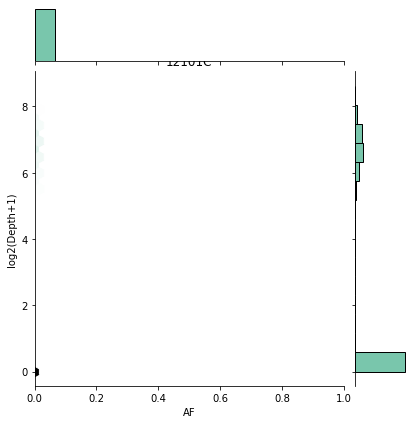

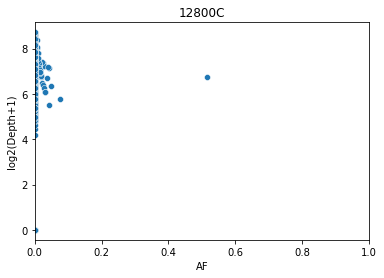

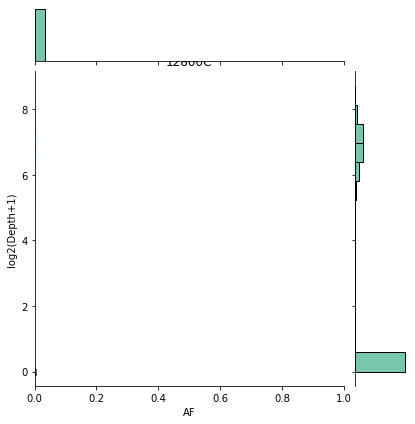

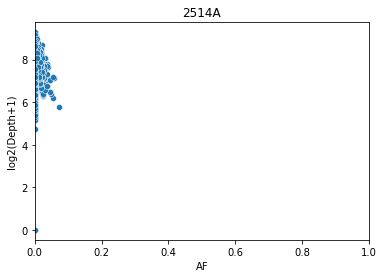

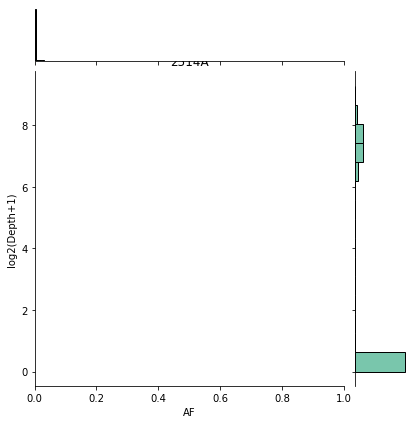

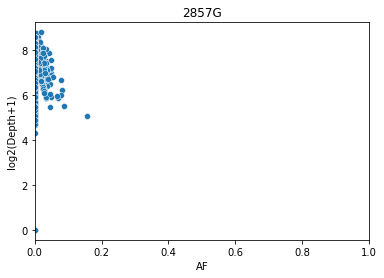

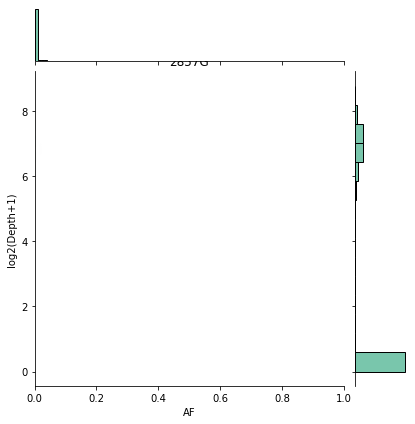

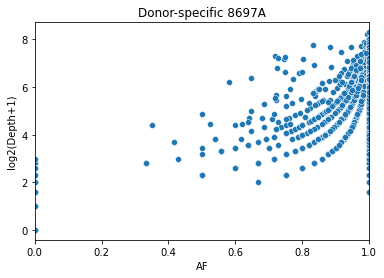

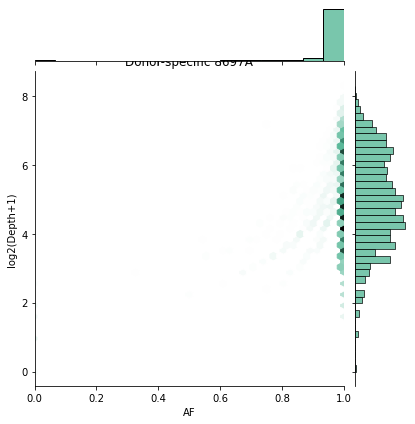

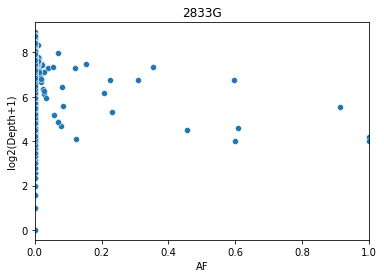

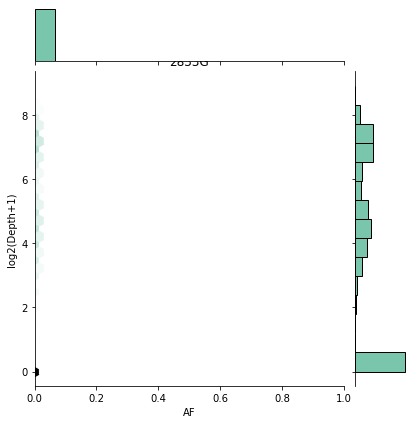

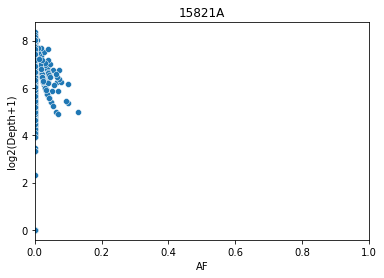

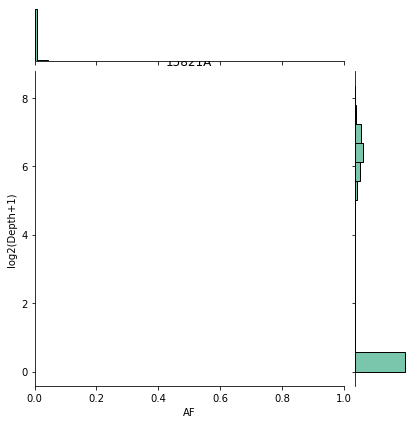

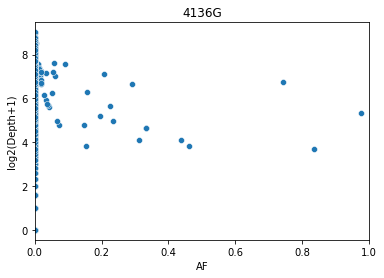

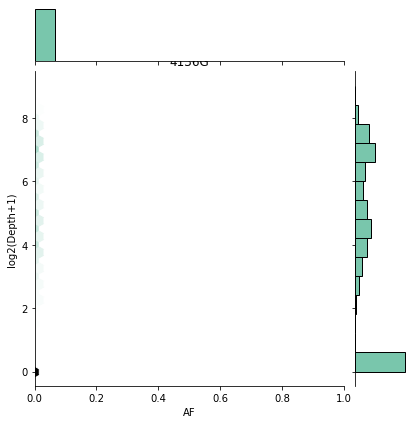

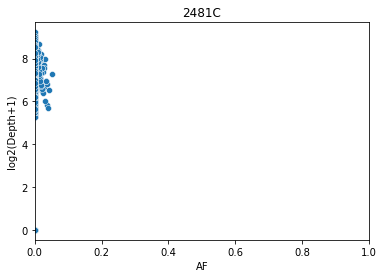

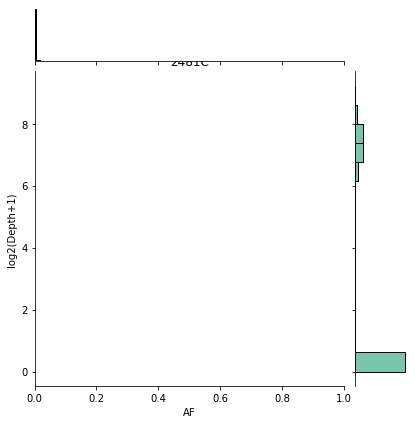

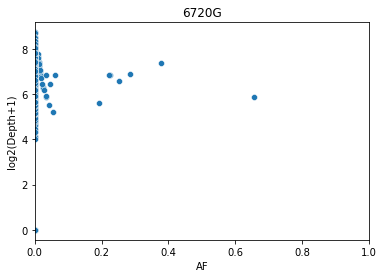

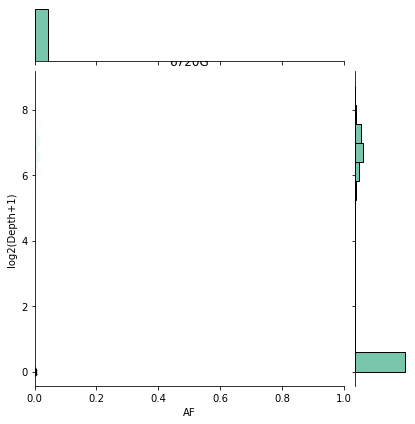

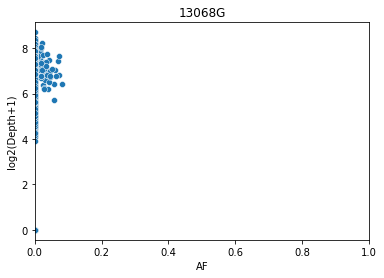

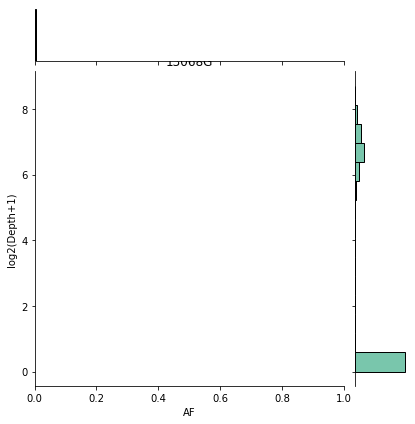

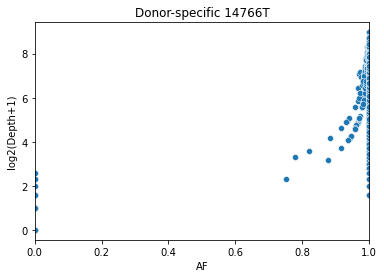

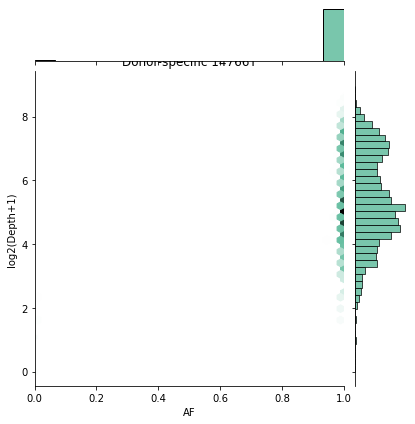

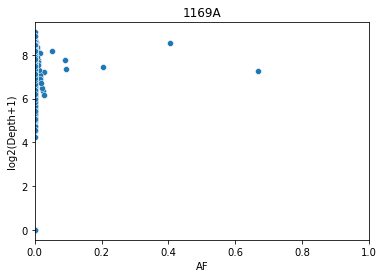

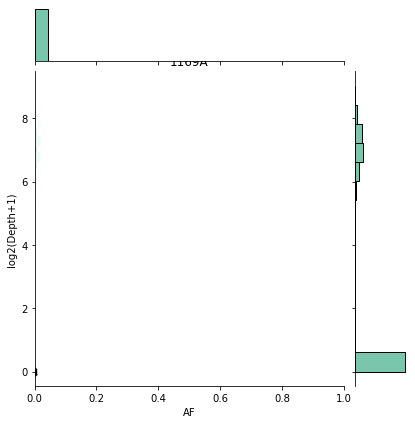

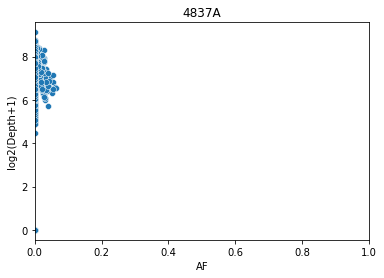

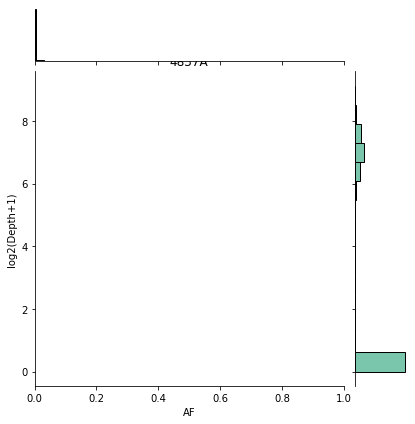

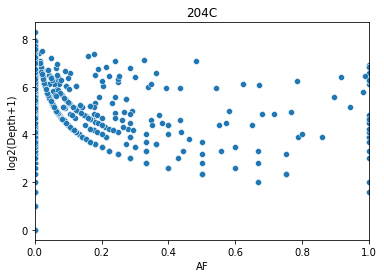

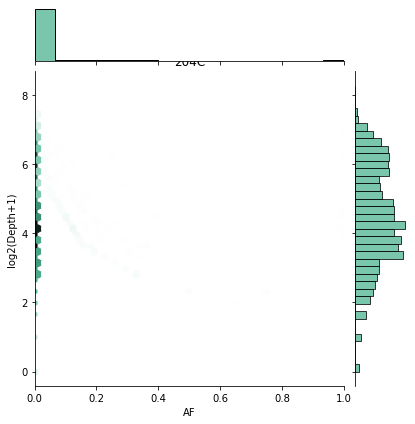

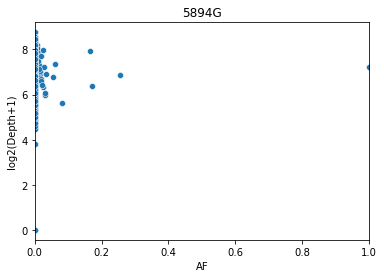

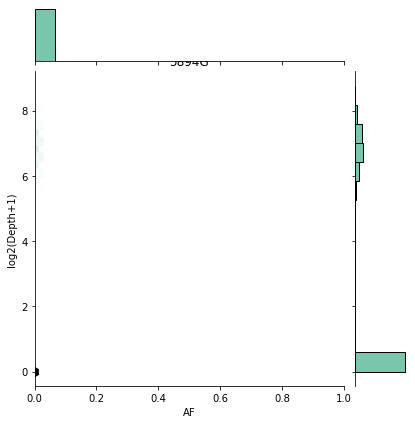

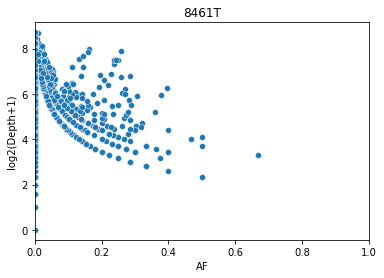

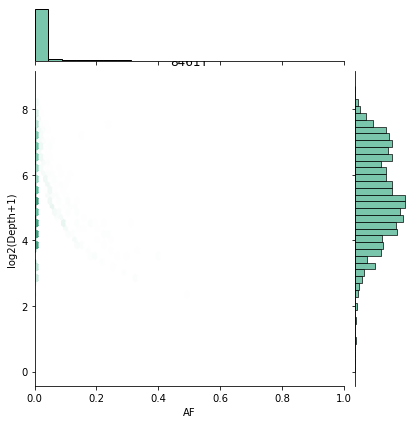

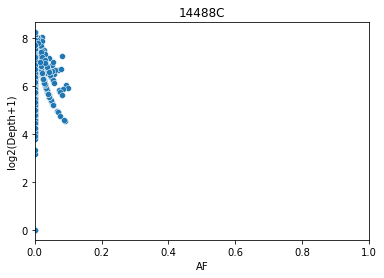

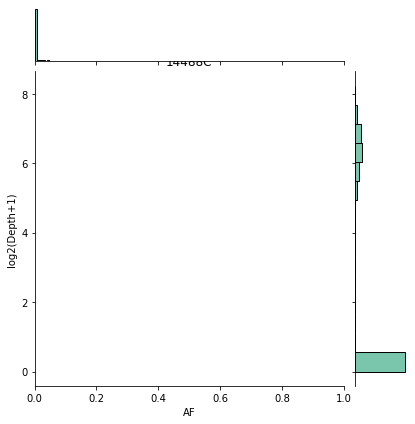

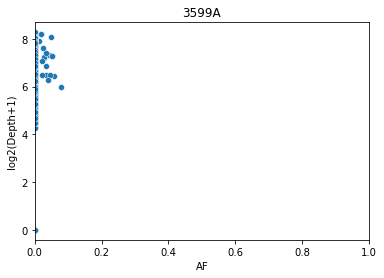

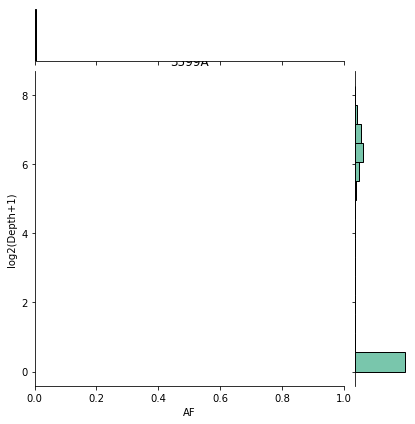

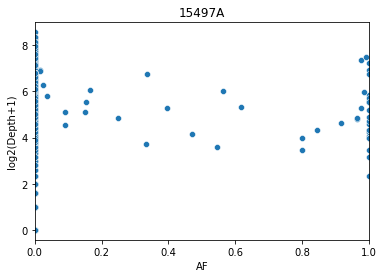

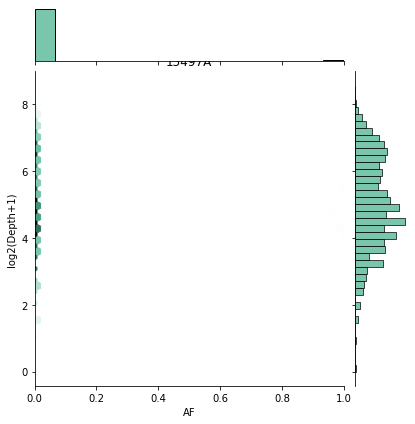

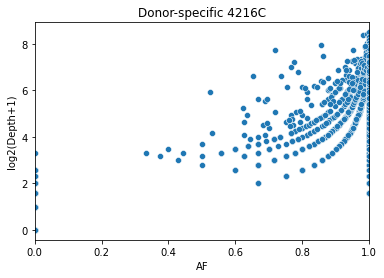

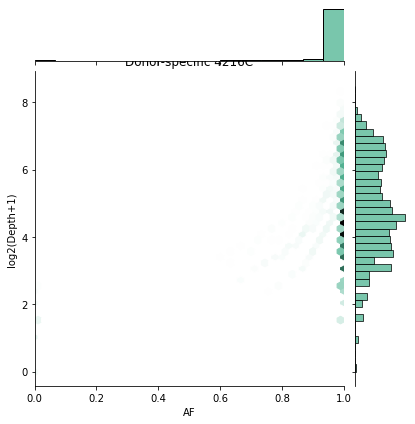

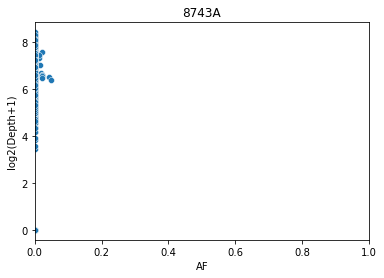

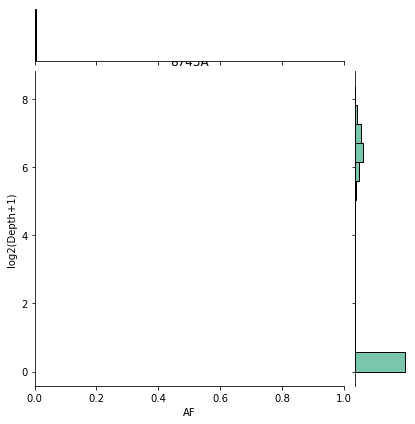

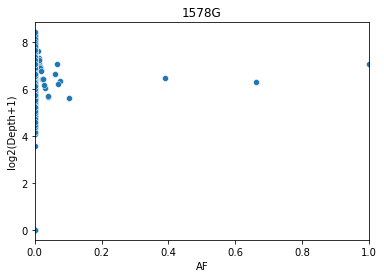

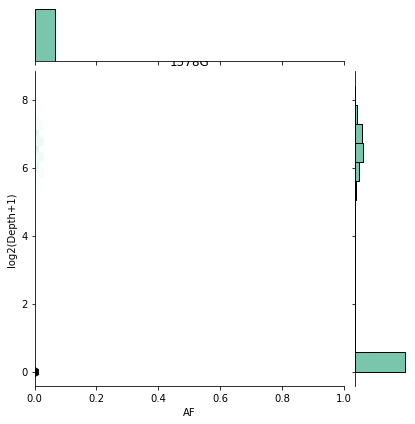

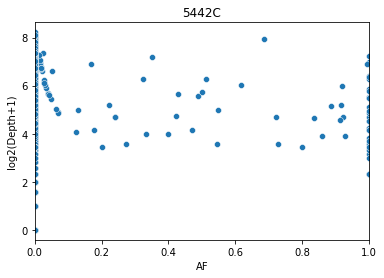

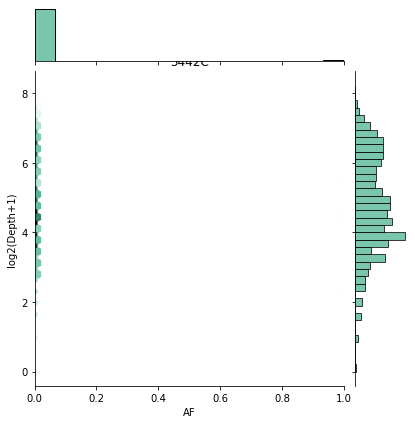

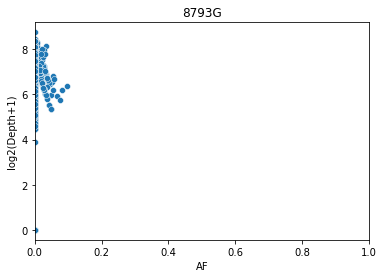

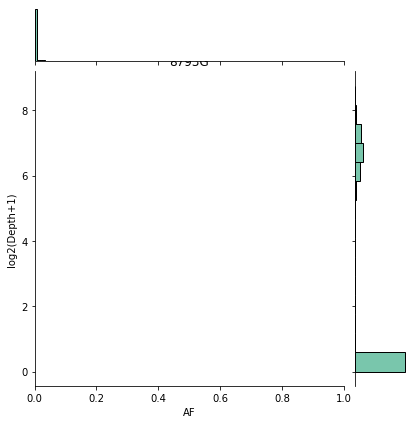

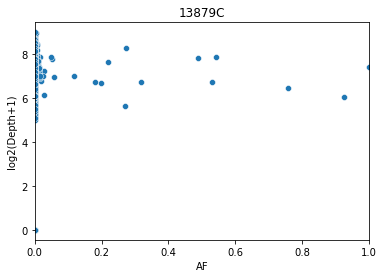

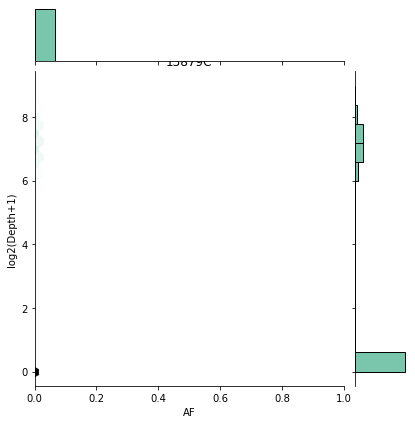

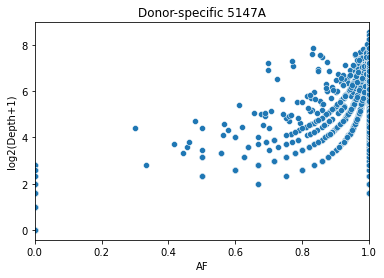

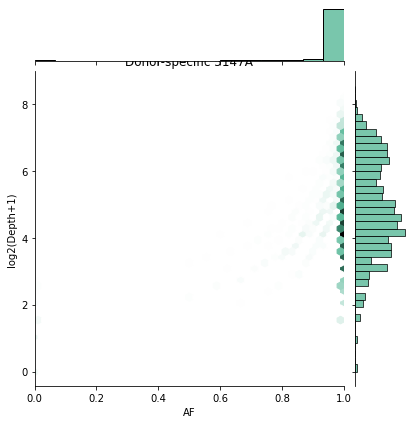

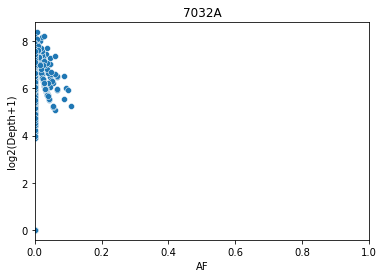

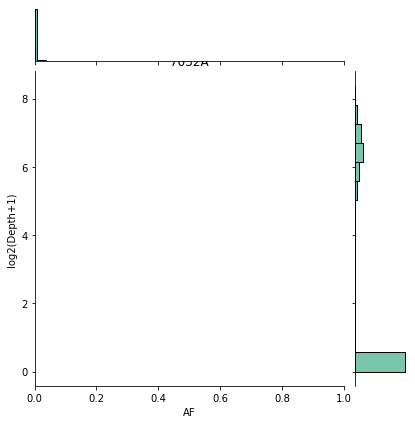

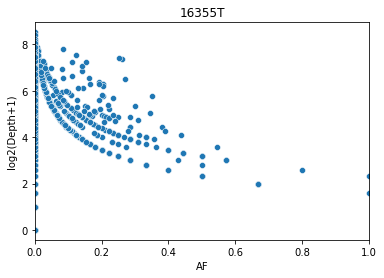

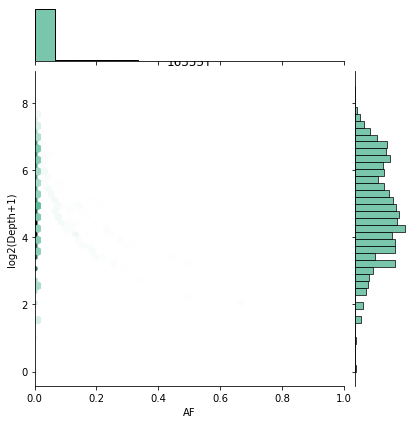

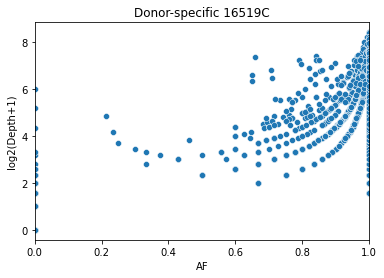

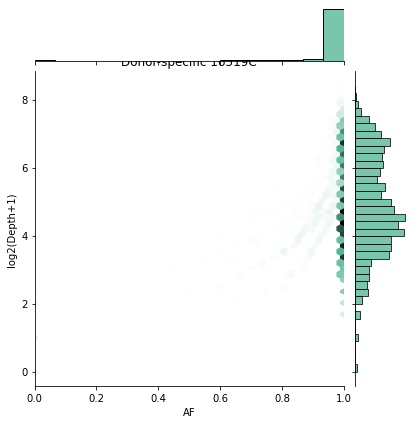

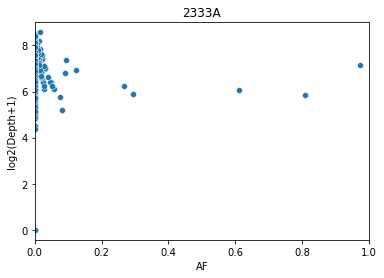

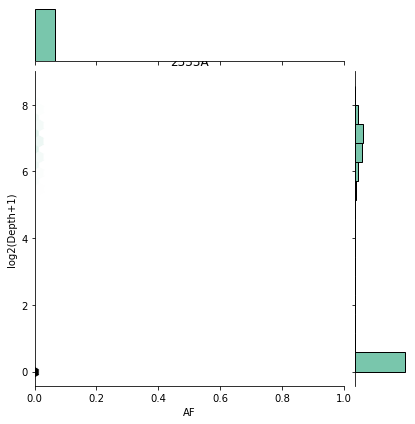

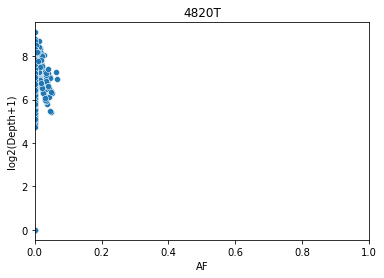

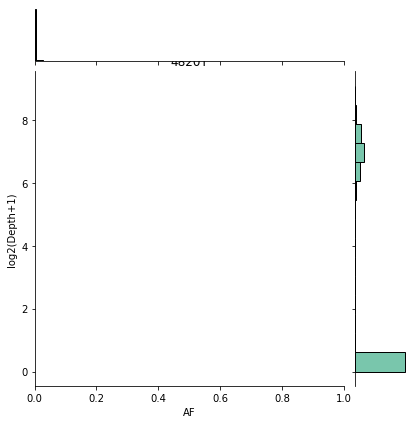

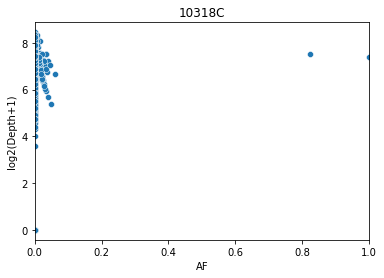

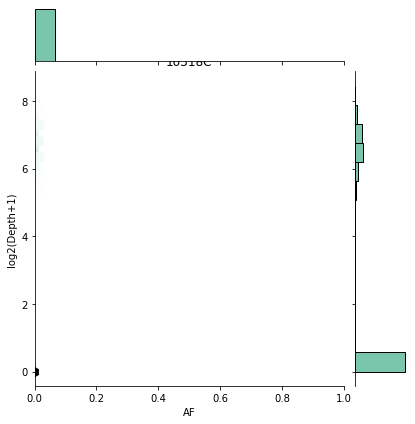

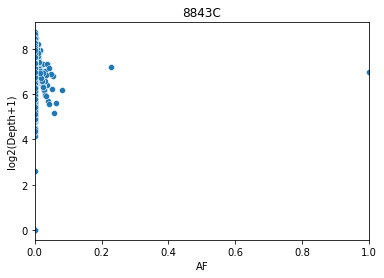

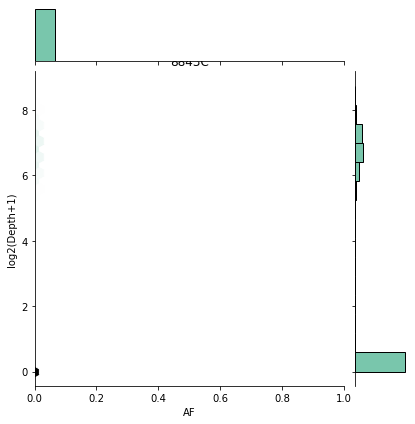

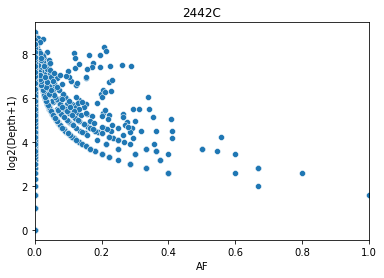

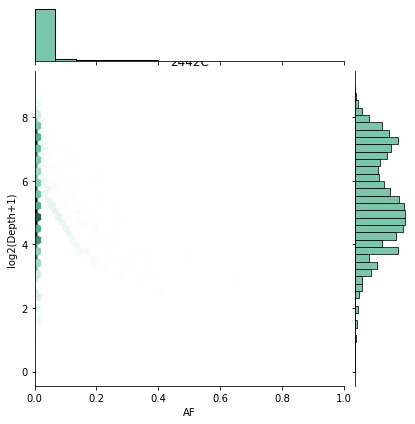

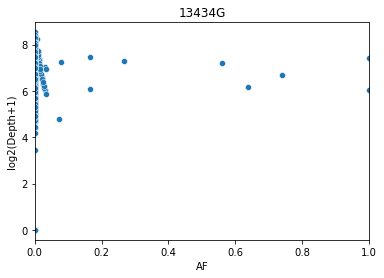

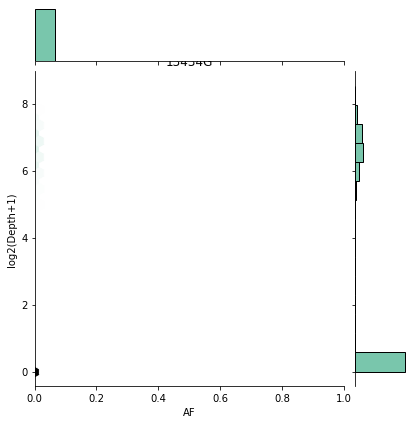

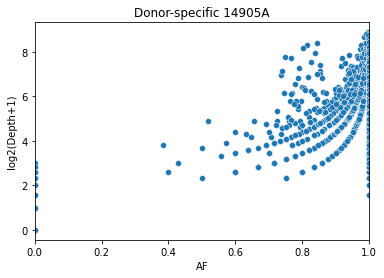

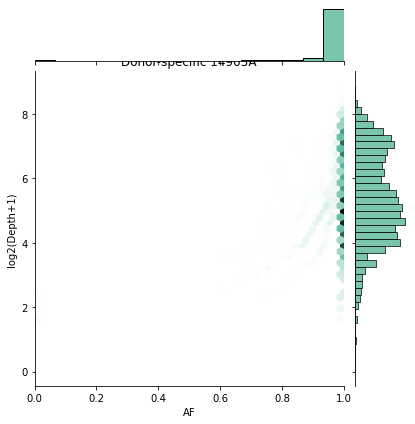

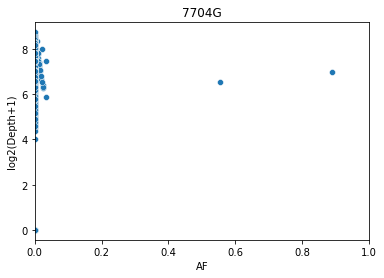

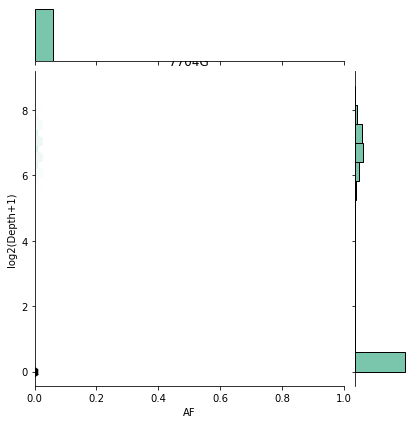

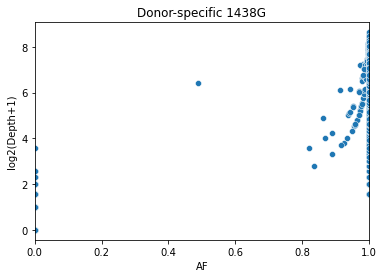

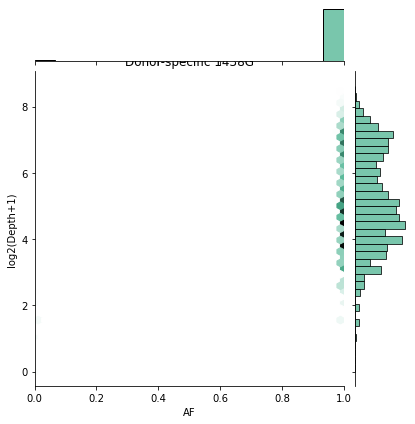

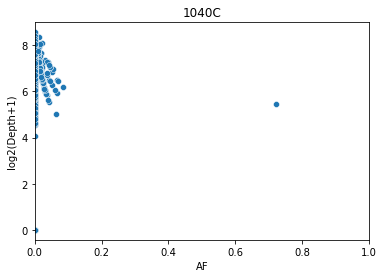

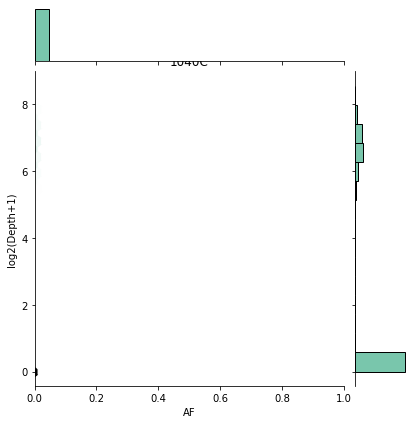

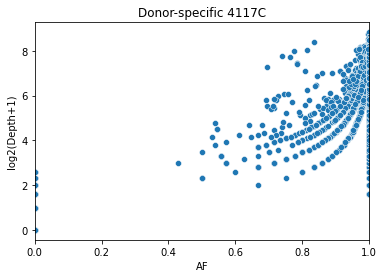

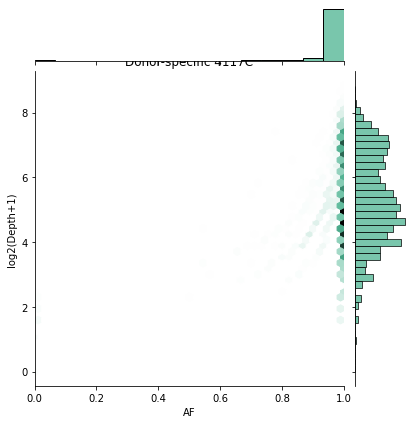

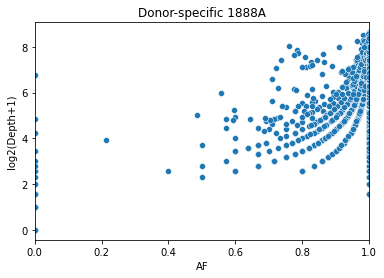

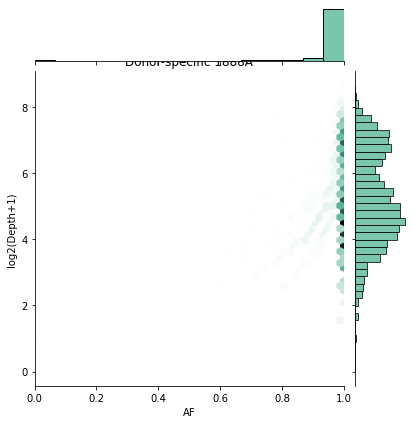

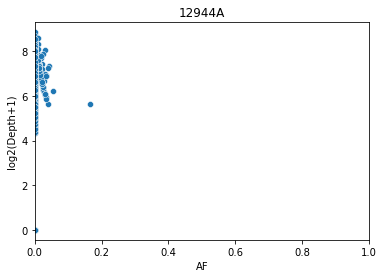

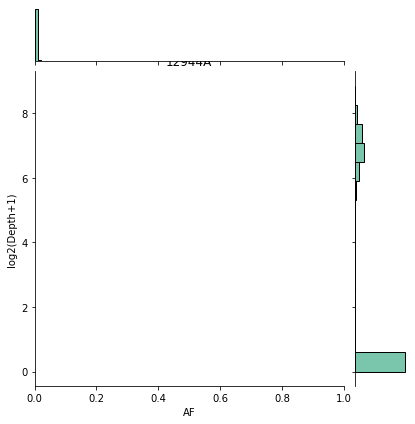

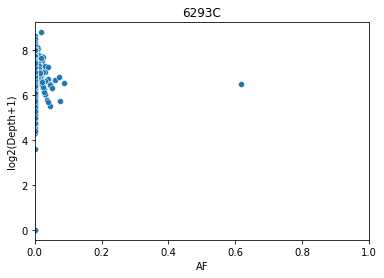

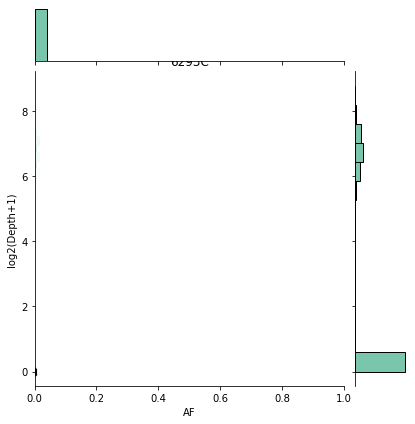

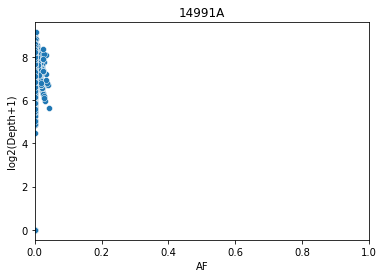

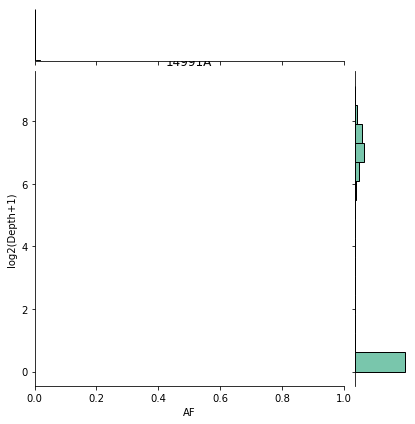

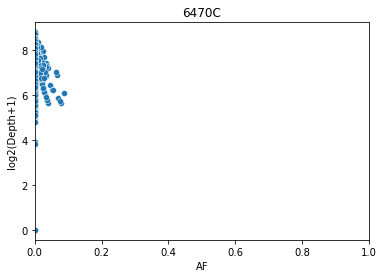

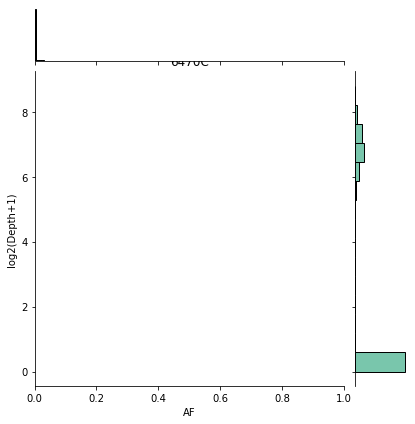

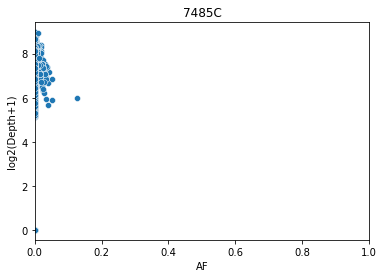

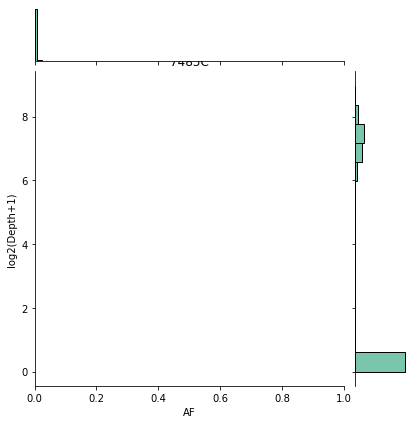

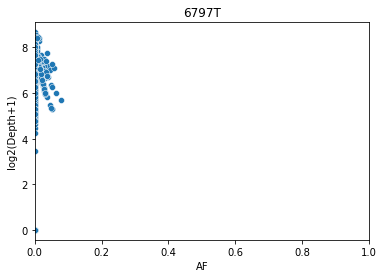

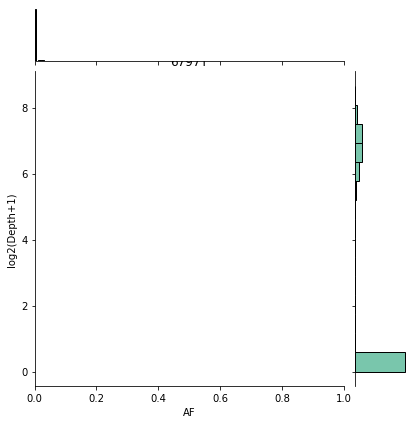

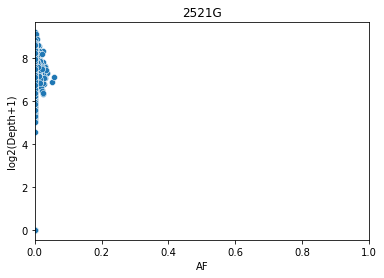

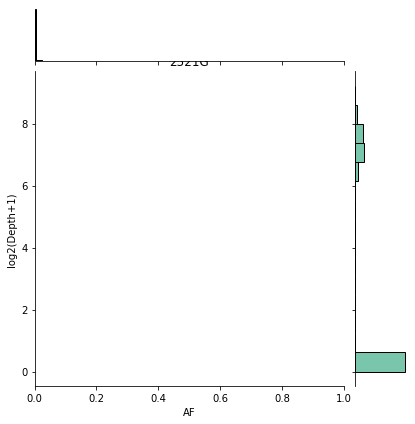

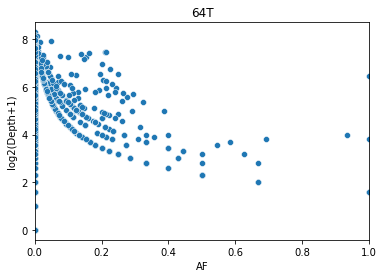

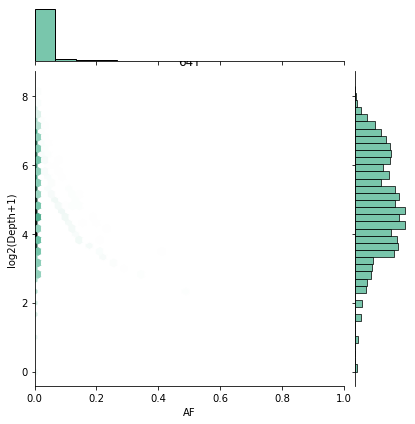

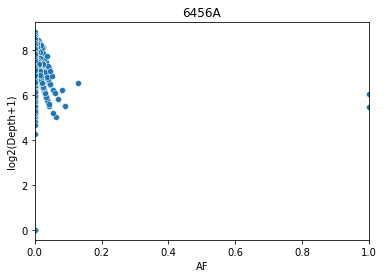

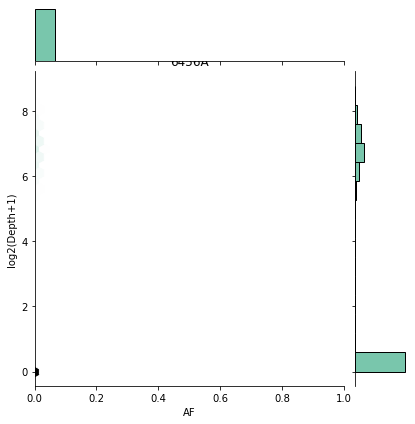

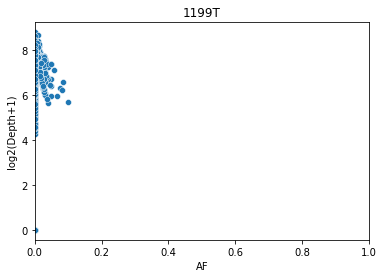

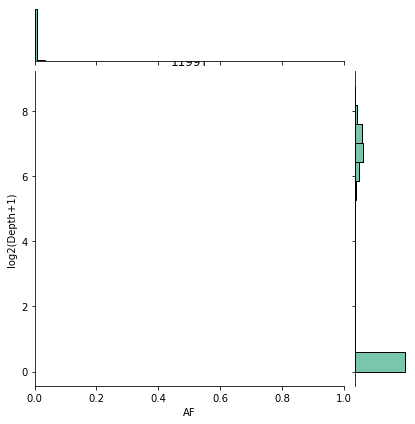

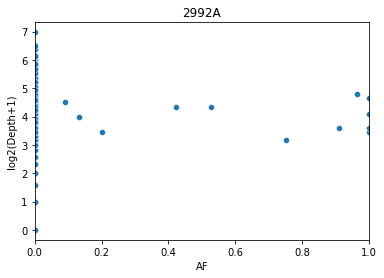

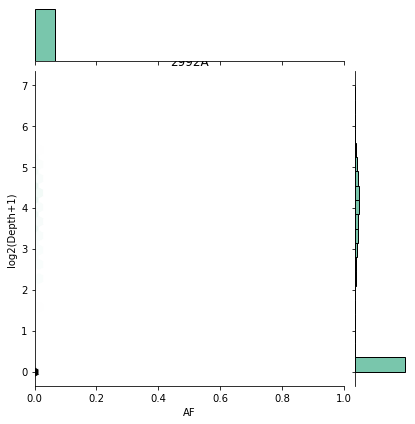

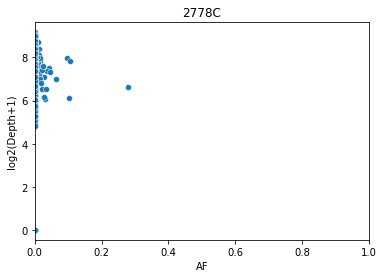

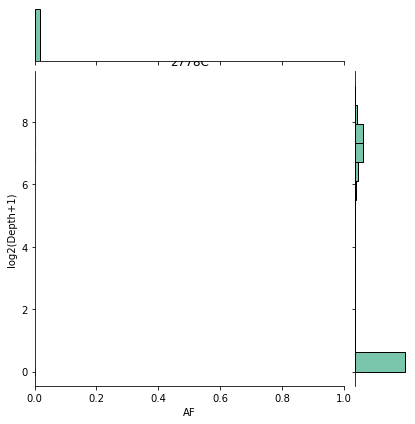

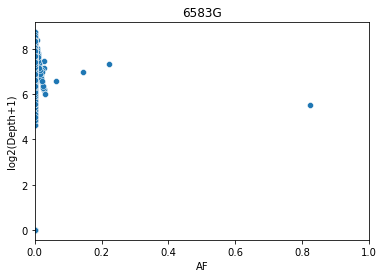

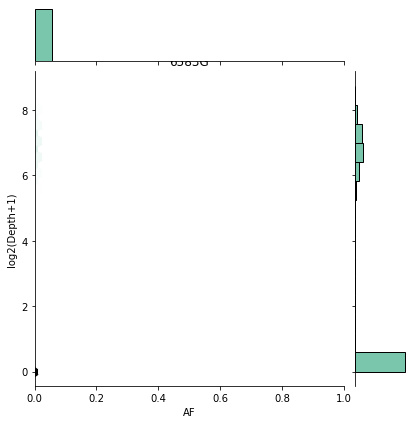

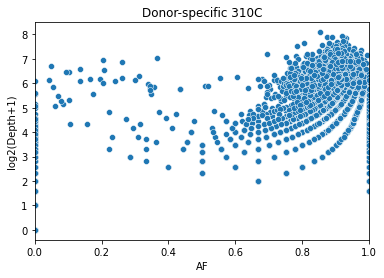

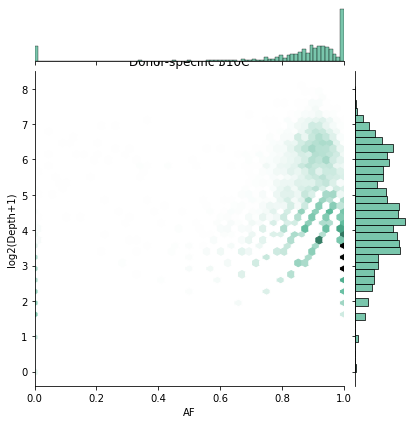

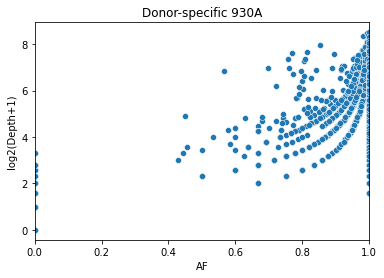

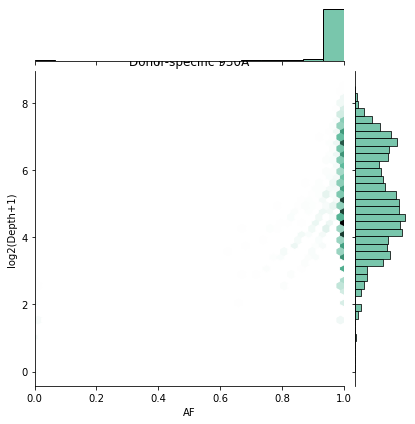

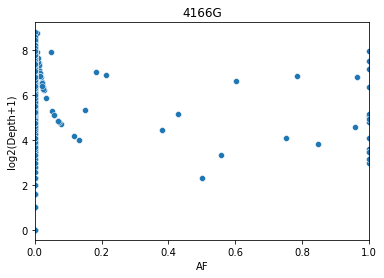

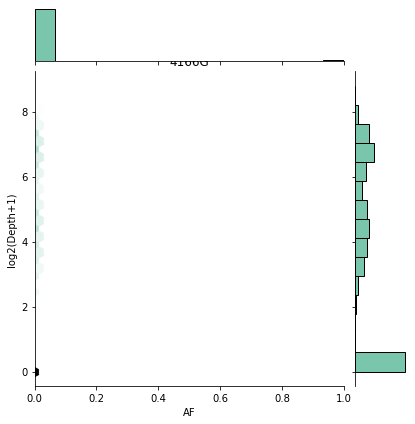

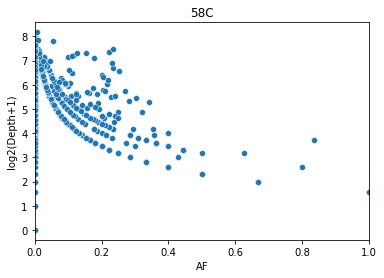

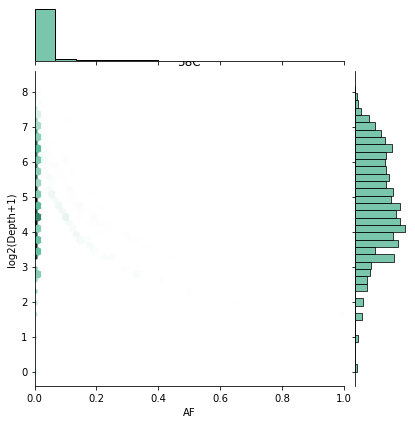

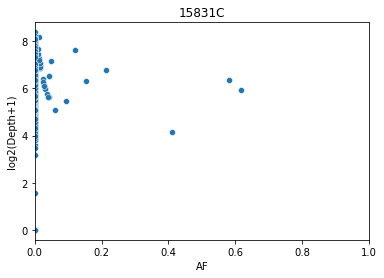

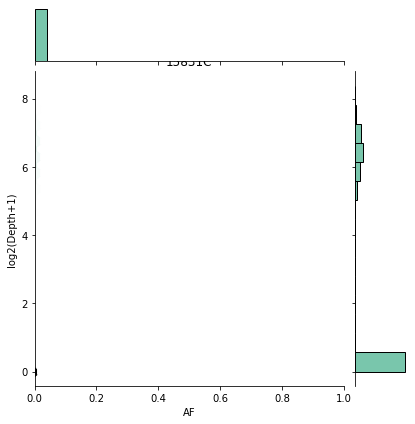

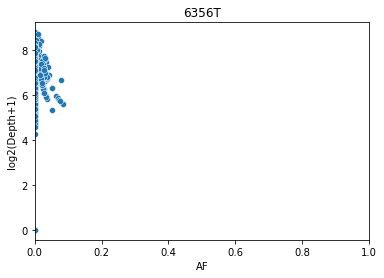

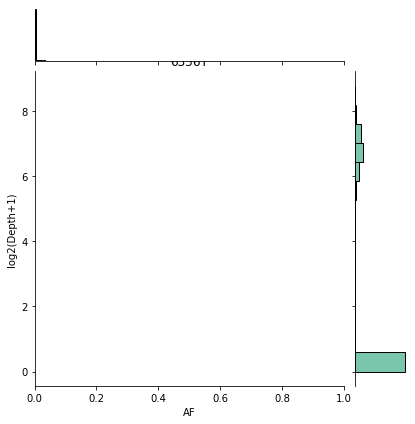

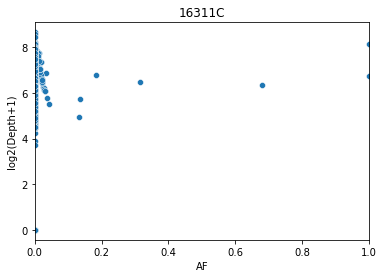

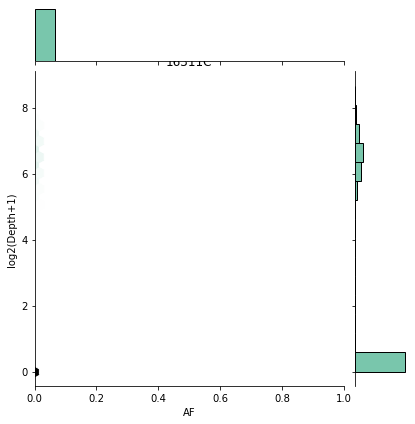

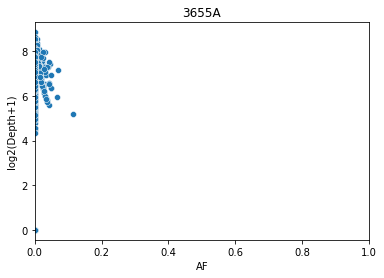

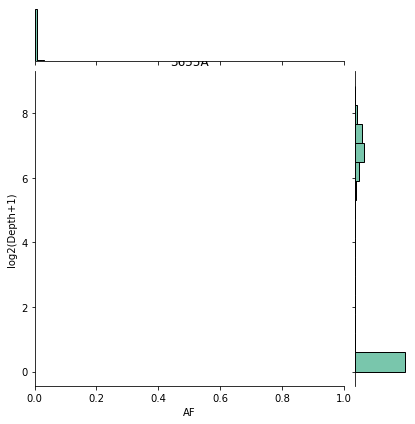

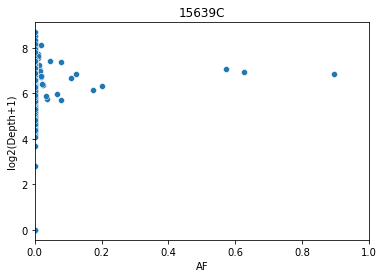

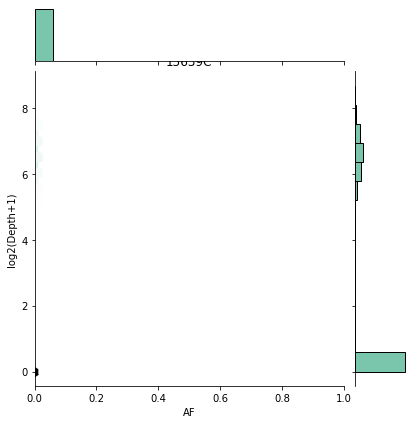

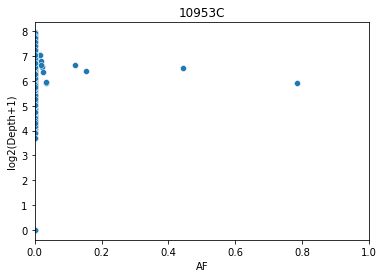

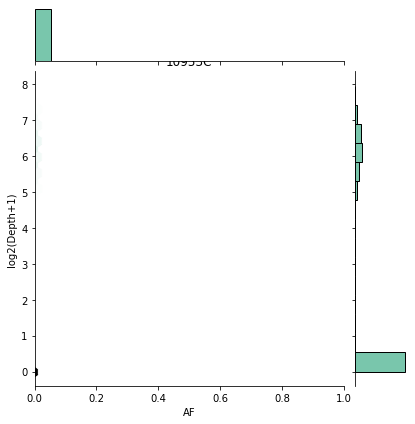

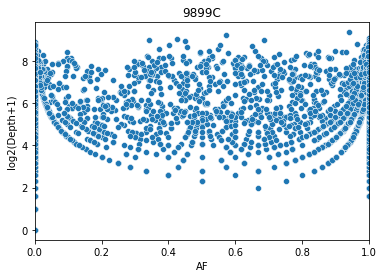

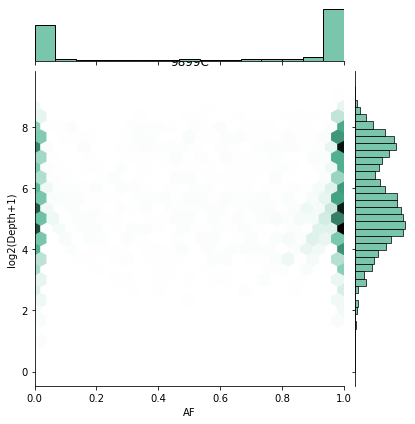

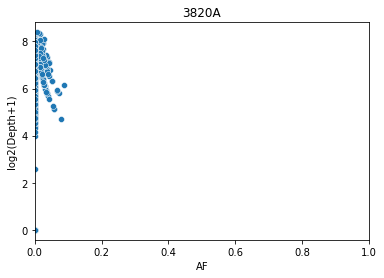

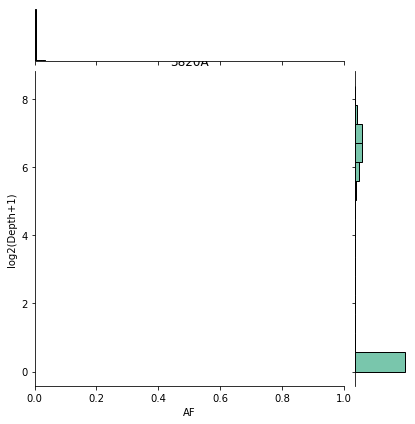

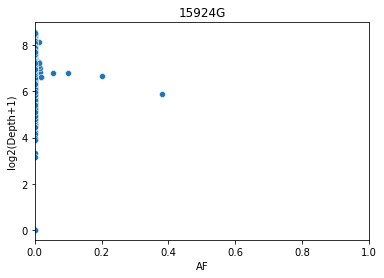

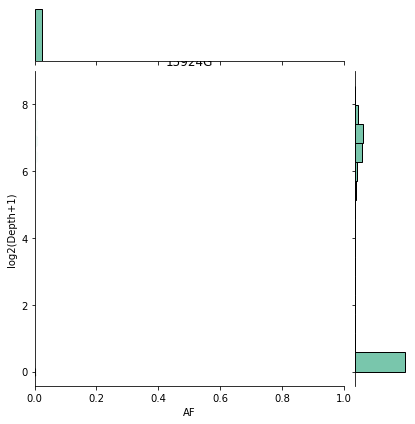

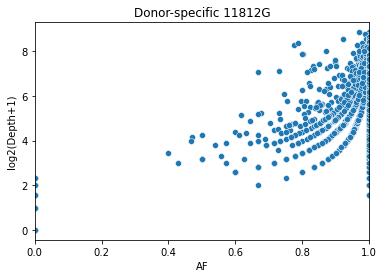

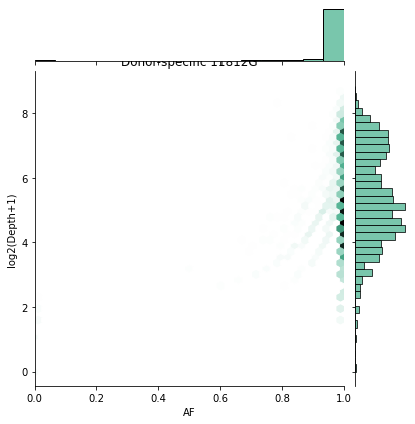

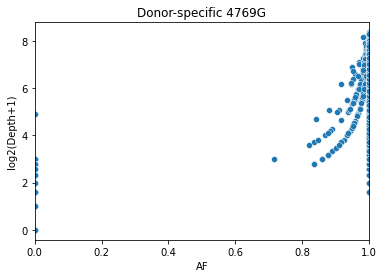

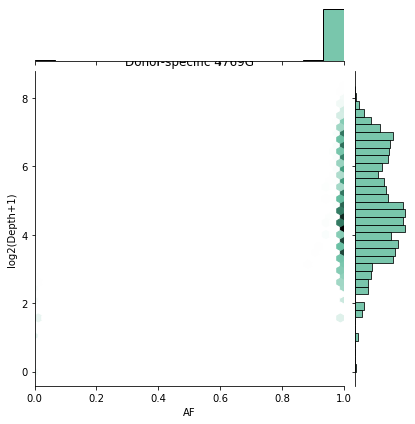

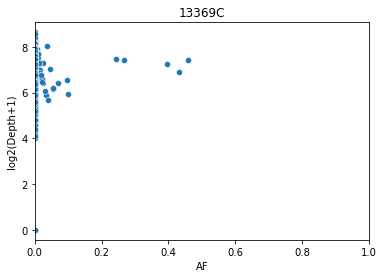

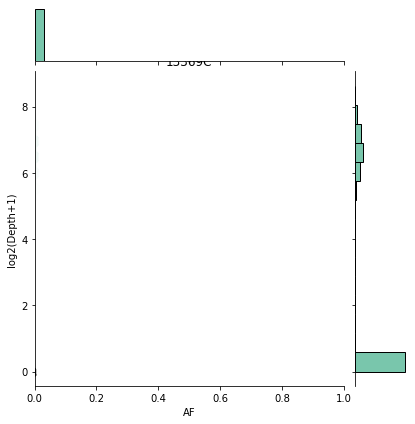

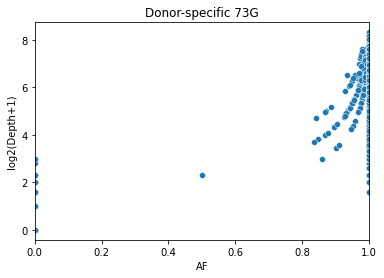

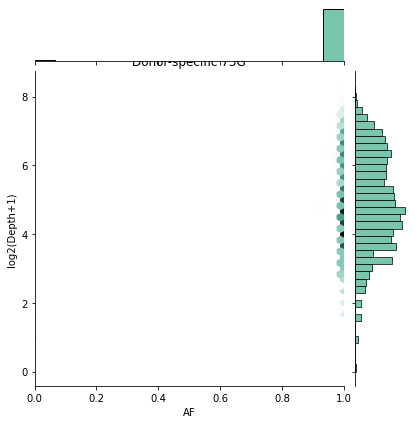

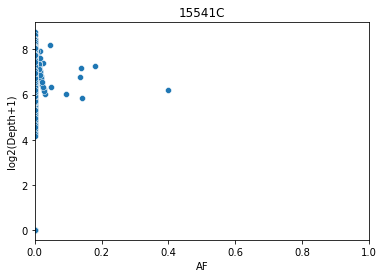

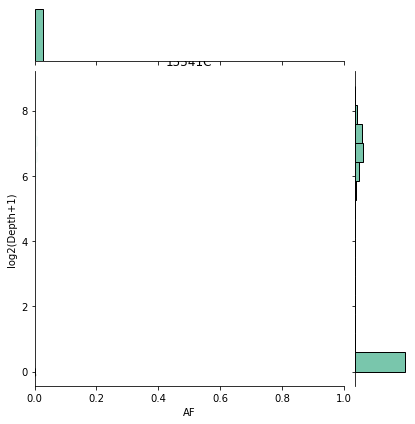

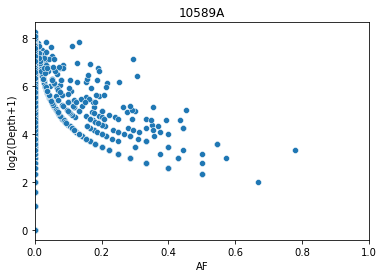

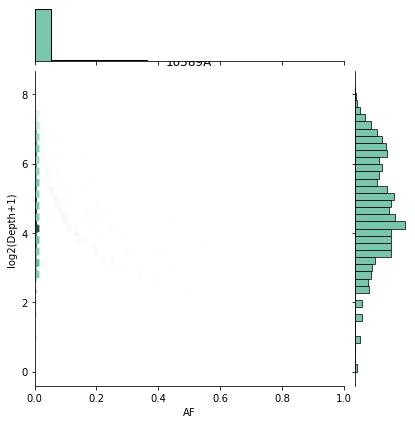

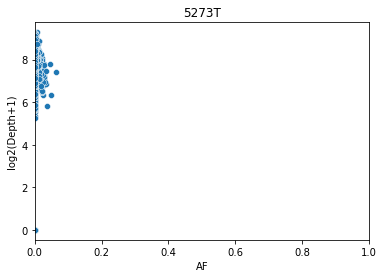

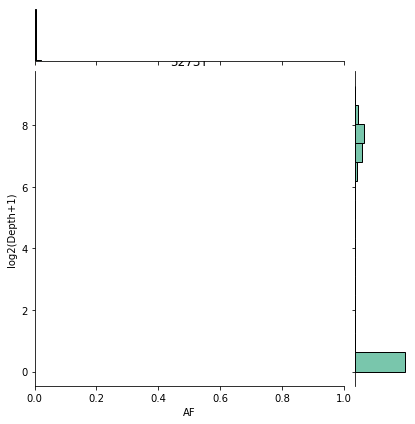

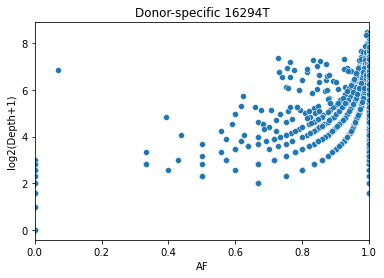

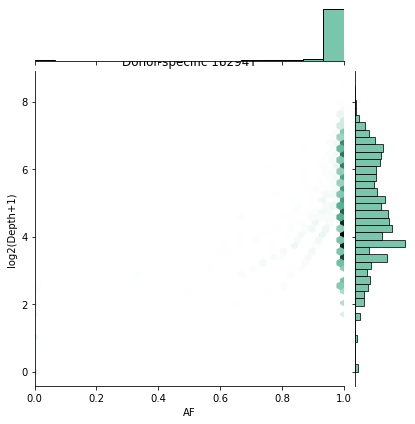

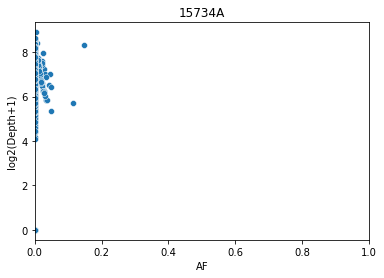

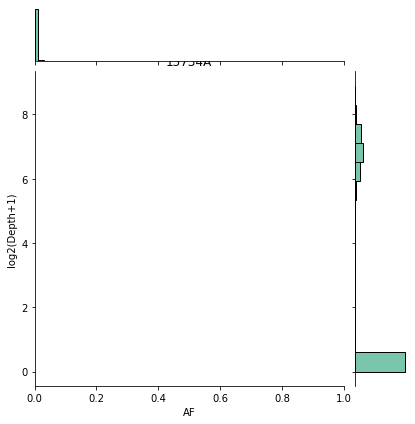

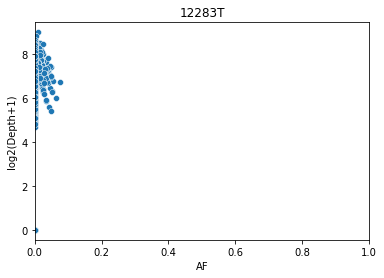

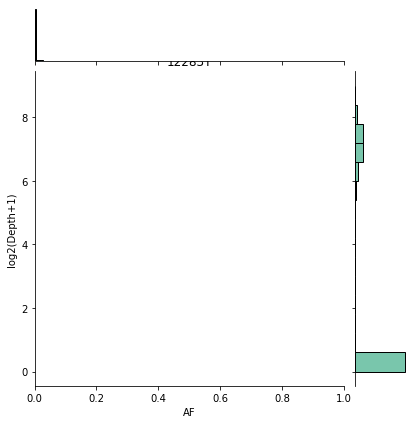

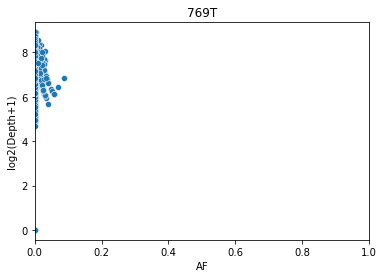

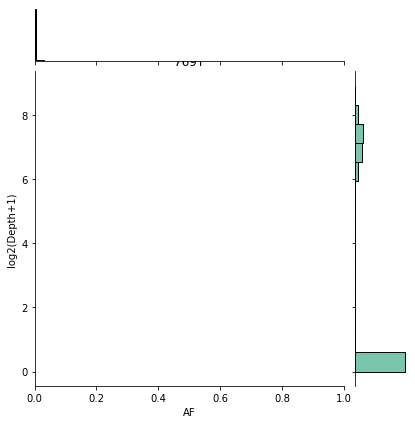

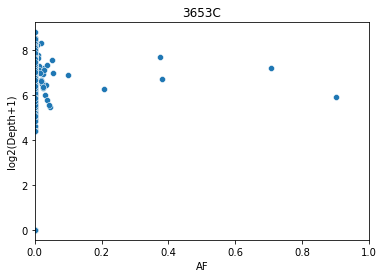

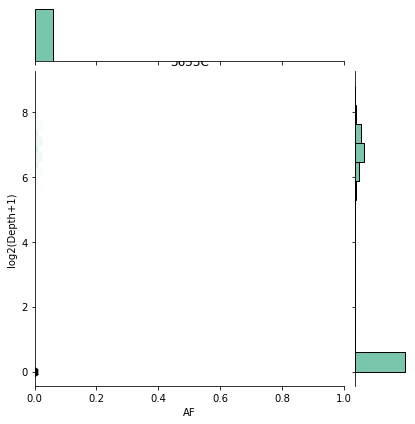

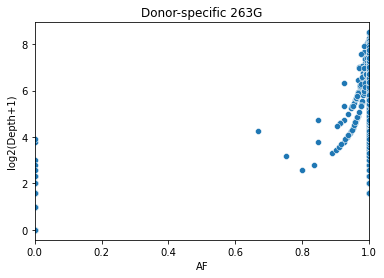

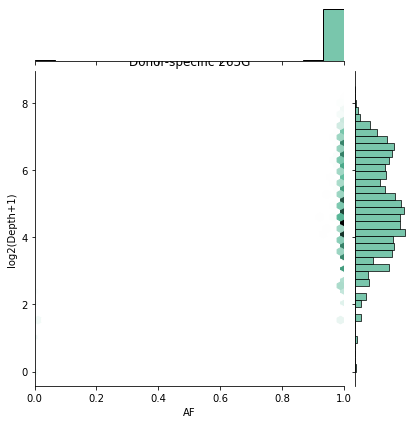

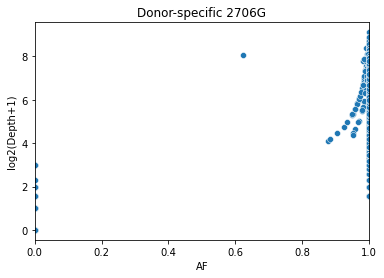

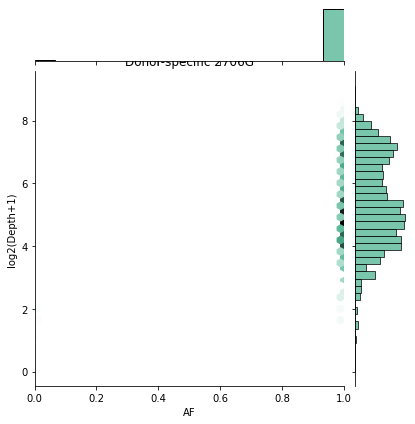

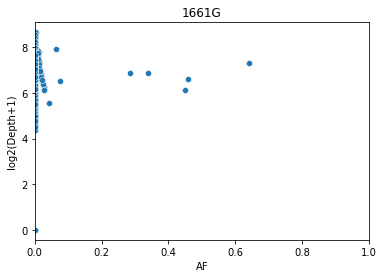

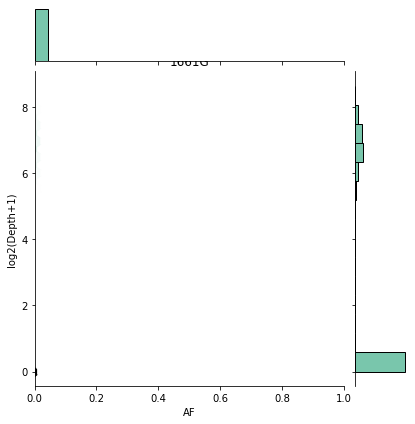

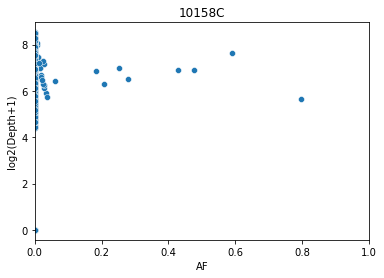

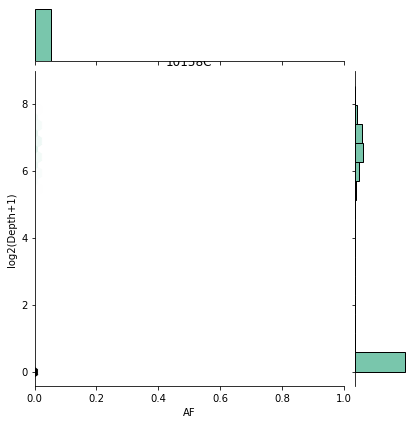

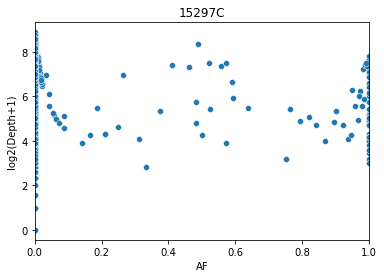

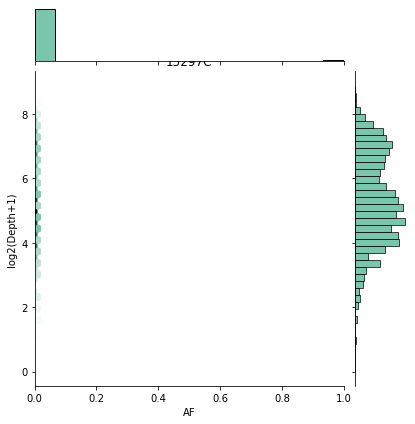

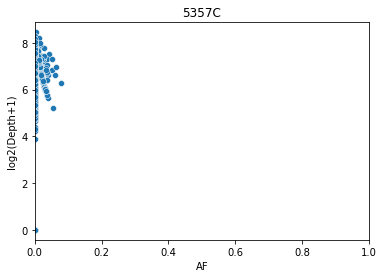

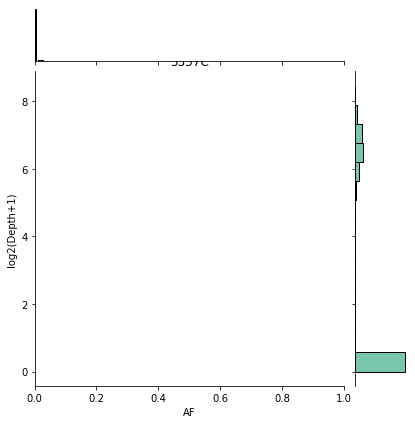

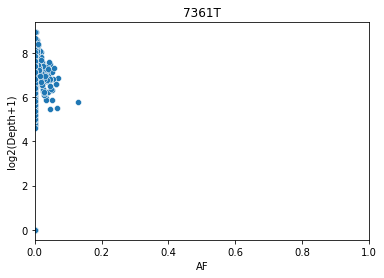

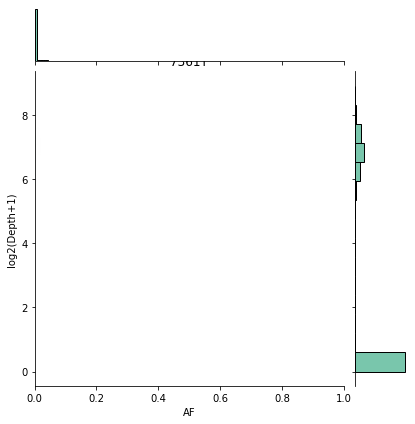

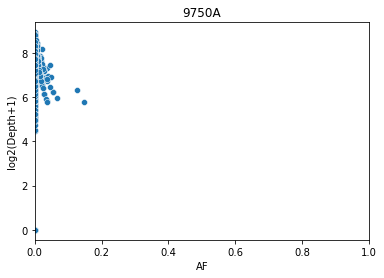

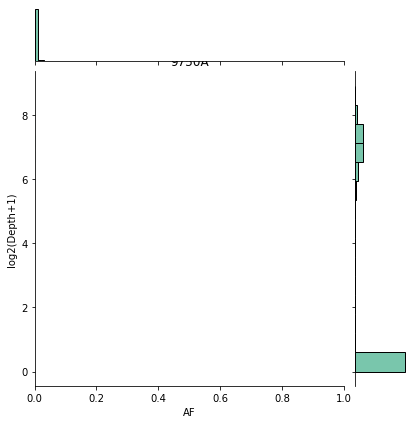

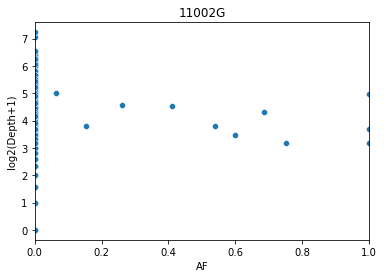

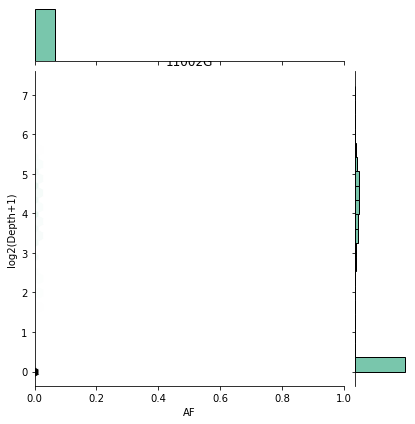

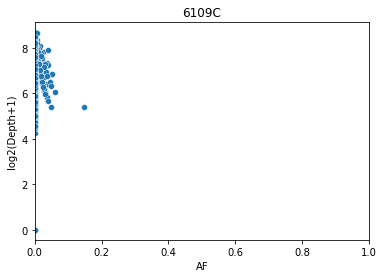

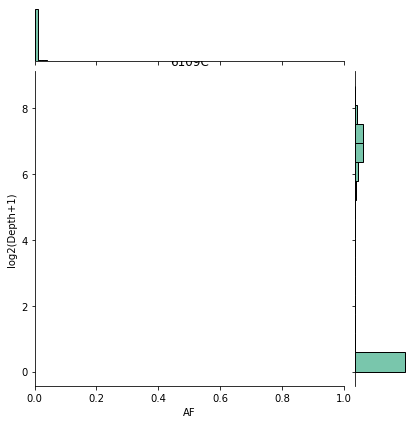

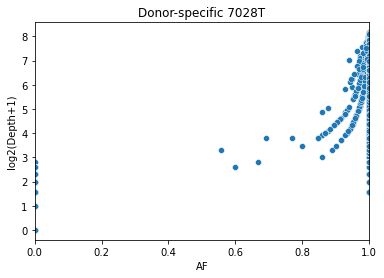

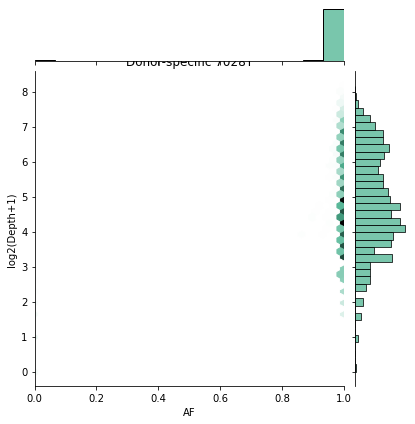

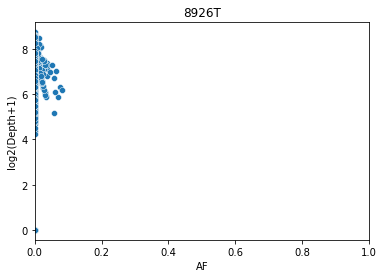

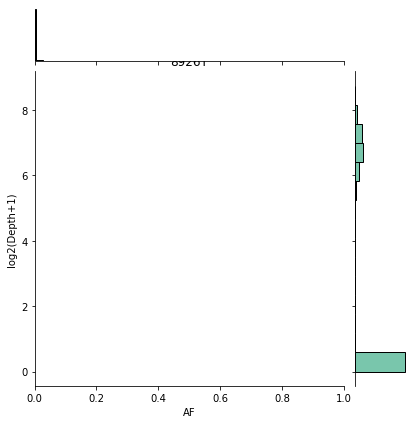

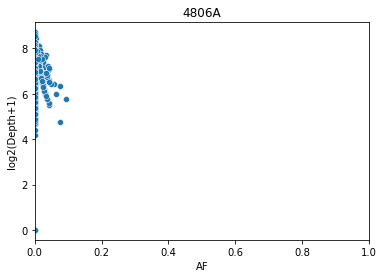

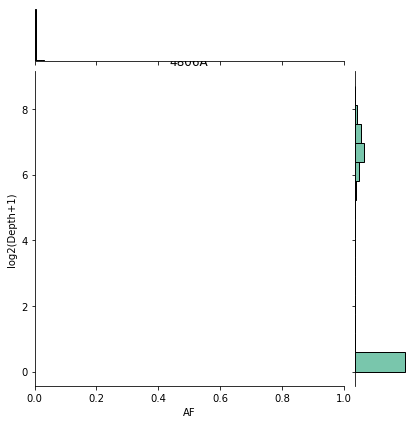

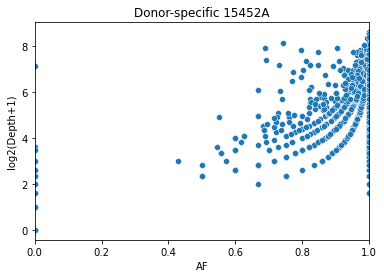

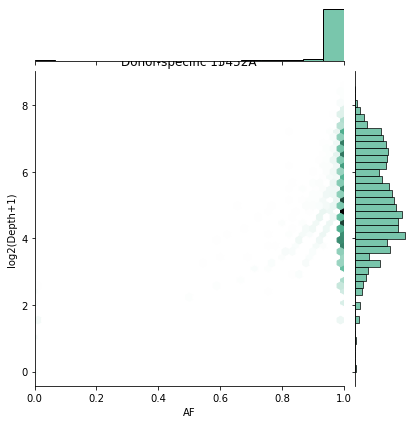

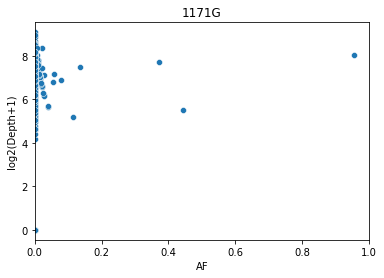

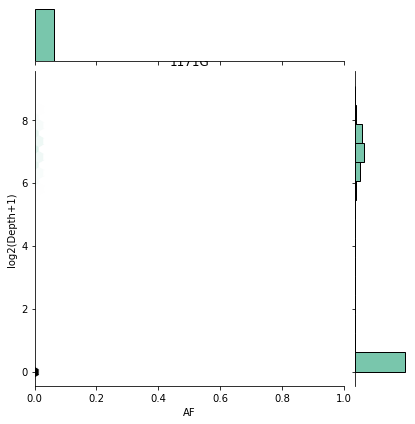

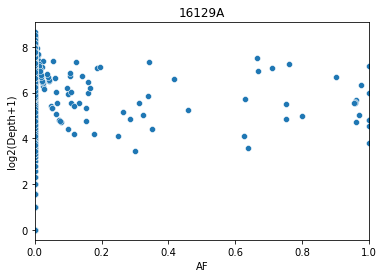

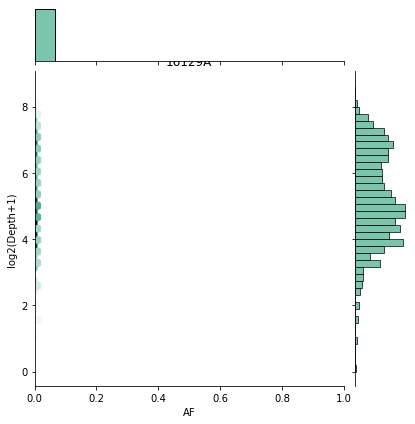

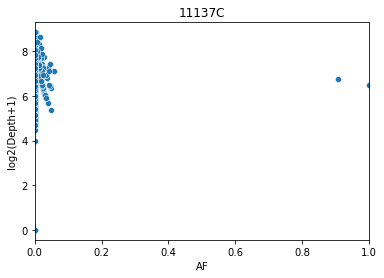

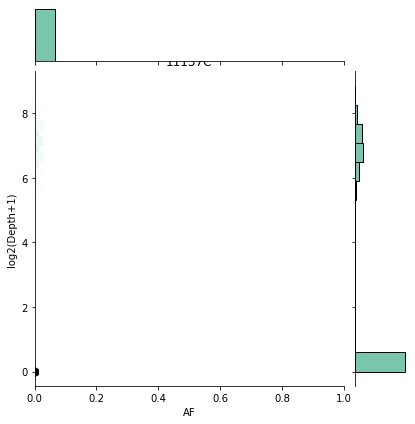

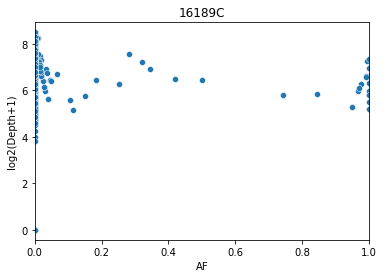

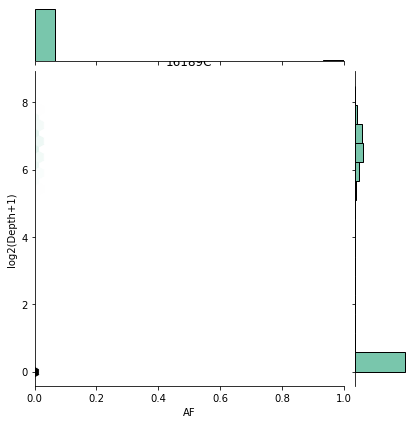

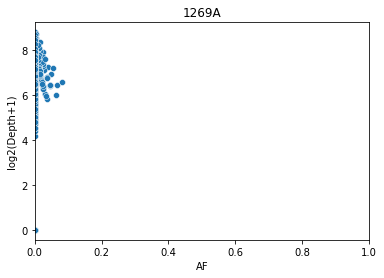

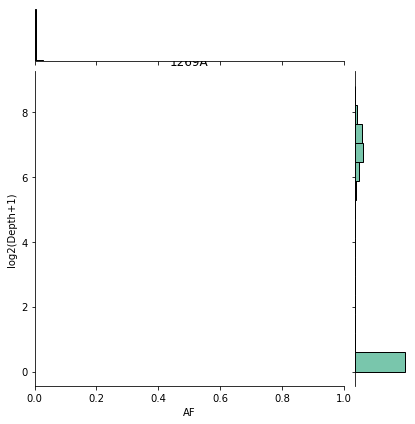

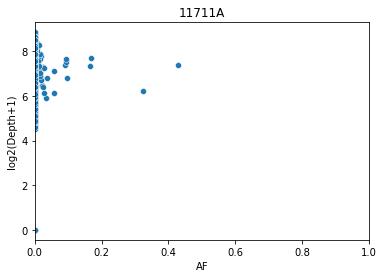

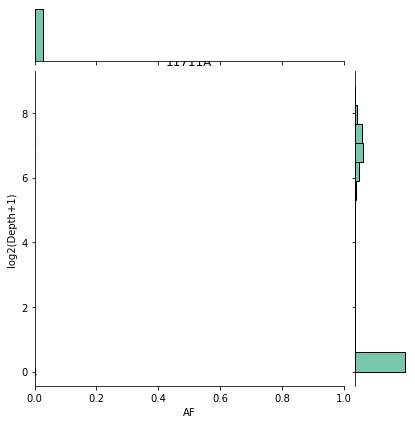

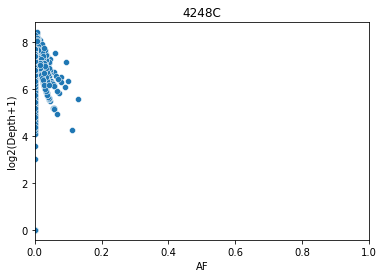

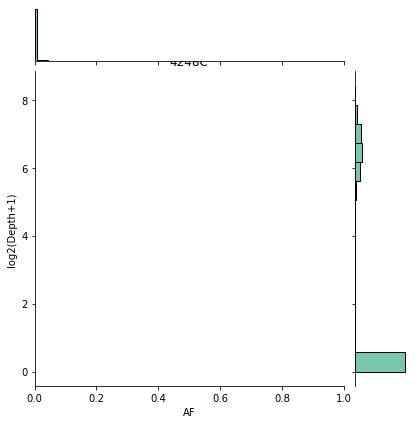

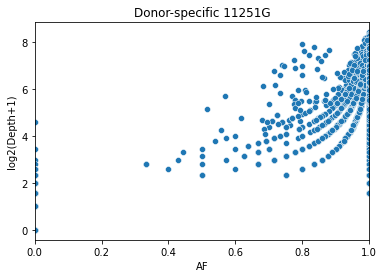

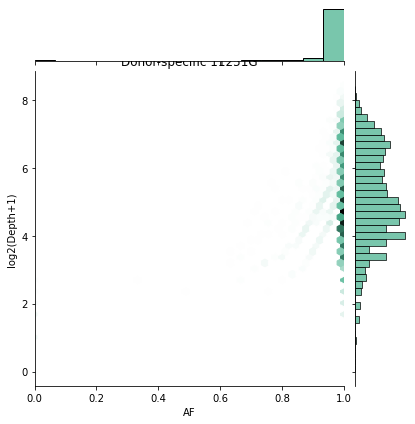

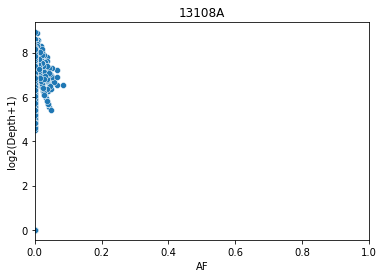

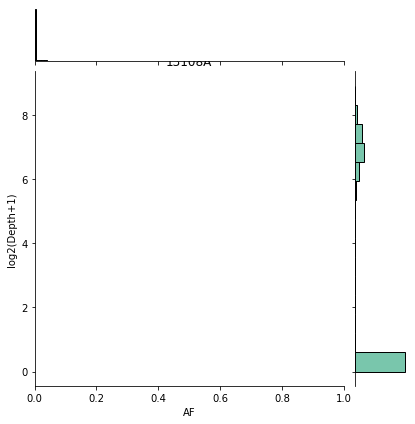

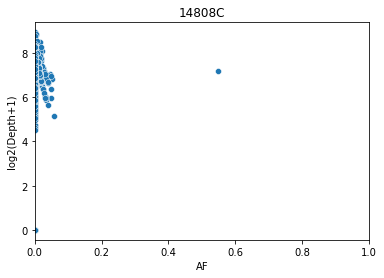

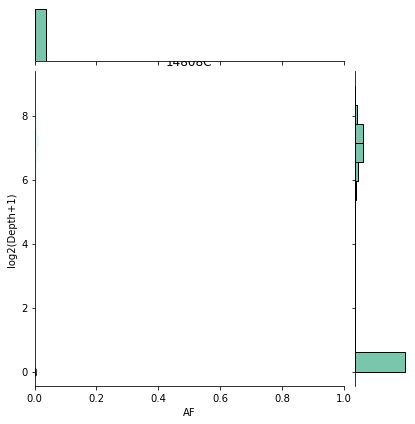

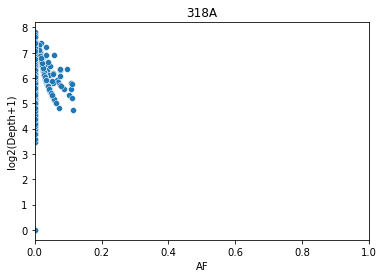

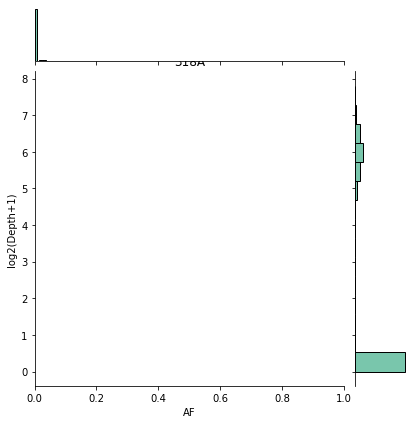

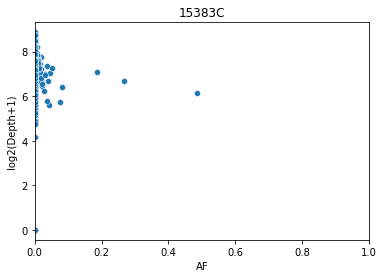

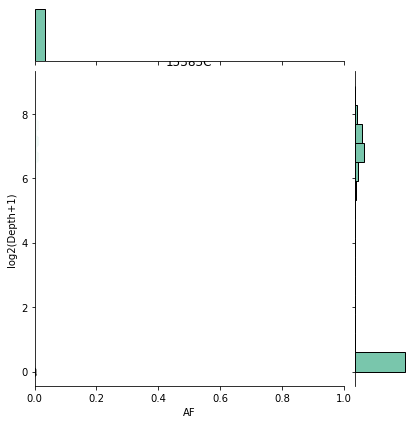

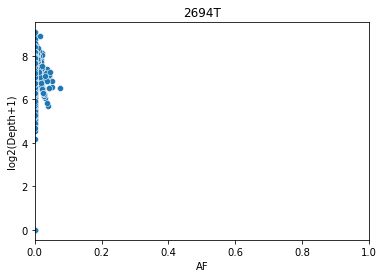

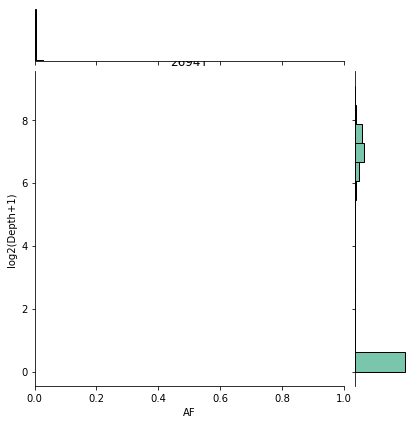

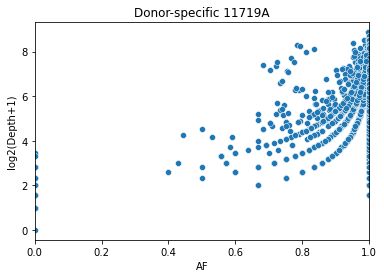

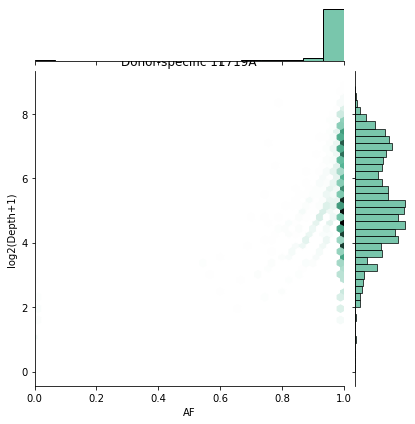

In [11]:
for variant in AF_df.index:
    f = plt.figure()
    sns.scatterplot(x=AF_df.loc[variant], y=np.log2(DP_df.loc[variant]+1))
    plt.xlabel("AF")
    plt.ylabel("log2(Depth+1)")
    if variant in donor_inds:
        plt.title(f"Donor-specific {variant}")
    else:
        plt.title(variant)
    plt.xlim([0,1])    
    plt.savefig(f"{out_f}._{variant}.png")
    
    sns.jointplot(x=AF_df.loc[variant], y=np.log2(DP_df.loc[variant]+1), 
              kind="hex", color="#4CB391")
    plt.xlabel("AF")
    plt.ylabel("log2(Depth+1)")
    plt.xlim([0,1])
    if variant in donor_inds:
        plt.title(f"Donor-specific {variant}")
    else:
        plt.title(variant)

## Clone-variant specific

In [12]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
# if "donor_index" in cells_meta.columns and "lineage_index" in cells_meta.columns:
#     cells_meta = cells_meta.sort_values(["donor_index", "lineage_index"])
#AD_df = pd.merge(AD_df, vcf[["#CHROM", "POS", "ALT"]], how="inner", left_index=True,right_index=True).set_index(["#CHROM", "POS", "ALT"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR].set_index("ID")
curr_labels["name"] = curr_labels["donor"].astype(str) + "_" + curr_labels["lineage"].astype(str)

curr_labels

lineage  donor condition  name
ID                                                        
AAACGAAAGCATACCT-1_Control        0      0   Control   0_0
AAACTCGGTTGGCTTA-1_Control        0      0   Control   0_0
AAACTGCAGGATGTAT-1_Control        0      0   Control   0_0
AAAGATGCAGGCAGAT-1_Control        0      0   Control   0_0
AAAGATGTCGCTCTAC-1_Control        0      0   Control   0_0
...                             ...    ...       ...   ...
GTTGGGCGTAACCCAT-1_Input         69      0     Input  0_69
AGGCCTGGTAGGGTCA-1_Control       70      0   Control  0_70
GCCATAATCCCACTAC-1_Control       70      0   Control  0_70
CCGCATTCATCACAAC-1_Control       71      0   Control  0_71
GTGCTGGTCGTCAACA-1_Input         71      0     Input  0_71

[8275 rows x 4 columns]

In [ ]:
for cln, val in curr_labels.groupby("name"):
    print(cln)
    curr_af = AF_df.loc[:, val.index]
    curr_dp = np.log2(DP_df.loc[:, val.index]+1)

    for variant in curr_af.index:
        if variant in donor_inds:
            title = f"Clone {cln} variant {variant} donor-specific"
        else:
            title = f"Clone {cln} variant {variant}"
        f = plt.figure()
        sns.scatterplot(x=curr_af.loc[variant], y=(curr_dp.loc[variant]))
        plt.xlabel("AF")
        plt.ylabel("log2(Depth+1)")
        plt.title(title)
        plt.xlim([0,1])
        plt.savefig(f"{out_f}.clone_{cln}_{variant}.png")

        plt.close()
        sns.jointplot(x=curr_af.loc[variant], y=curr_dp.loc[variant], 
                  kind="hex", color="#4CB391")
        plt.xlabel("AF")
        plt.ylabel("log2(Depth+1)")
        plt.xlim([0,1])
        plt.title(title)
        plt.savefig(f"{out_f}.clone_{cln}_{variant}_hex.png")
        plt.close()

In [ ]:
# #for n in range(N_DONORS):
# print(curr_ad_f)
# print(curr_dp_f)
# curr_ad = mmread(curr_ad_f).tocsc()
# curr_dp = mmread(curr_dp_f).tocsc()
# AD_df = pd.DataFrame(curr_ad.todense())
# AD_df.index.name = "Variant"
# AD_df.columns.name = "Cell"
# DP_df = pd.DataFrame(curr_dp.todense())
# DP_df.index.name = "Variant"
# DP_df.columns.name = "Cell"
# AF_df = AD_df/(DP_df+0.001)